# 全国Python职位数据分析

#### 数据源来自拉勾，数据采集日期为8.4-8.7日，分析日期为8.8-8.9,主要对Python从业者，Python开发工程师，数据分析师以及数据挖掘工程师进行了分析，由于对人工智能方面了解不深不能做出可观的分析，如有感兴趣者可以将我的数据再清洗一次。相关的数据文件和产生的图片都可以在附件中查看。
#### 本文主要从以下几方面进行分析
#### 1.Python相关职位所在城市的分布情况，以及应聘者资历所在城市的最低平均工资和最高平均工资
#### 2.Python相关职位教育程度，工作经验，工作状态要求
#### 3.Python相关职位标签分布情况
#### 4.提供Python相关职位的公司所提出的职位诱惑主要为什么
#### 5.提供Python相关职位的公司所提出的职位描述主要是什么
#### 6.Python相关职位的平均最低和最高薪资是多少，相关职位的巅峰是什么，有多少薪资
#### 7.Python相关职位的行业分布情况

In [213]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib import cm
plt.rc("font",family="SimHei",size="10")  #用于解决中文显示不了的问题

In [214]:
import re # 正则表达式库
import collections # 词频统计库
import jieba # 结巴分词
import wordcloud # 词云展示库
from PIL import Image # 图像处理库

## 读取文件

In [3]:
os.getcwd() # 获取当前路径

'C:\\Users\\HJiaJu\\Desktop\\数据分析'

In [4]:
df = pd.read_csv('C:\\Users\\HJiaJu\\Desktop\\数据分析\\detail.csv', encoding='GBK') # 读取文件

## 去重

In [5]:
df = df.drop_duplicates('职位链接', keep='first') # 根据链接进行去重
df = df.reset_index(drop=True) # 重置索引

## 预处理

### 薪资格式处理

In [6]:
# 去除k以及-，并生成两个series
def slary_split(line):
    slary_split = line.replace('K','')
    slary_split = slary_split.replace('k','').split('-')
    return Series([int(slary_split[0].strip()), int(slary_split[1].strip())])

In [7]:
df_tmp = df['薪资'].apply(slary_split)

In [8]:
df_tmp = df_tmp.rename(columns={0:'最低工资',1:'最高工资'}) # 重命名

In [9]:
df = pd.concat([df,df_tmp], axis=1).drop(['薪资'],axis=1) # 组合新的df，删除原来的薪资

### 职位分类(筛选非python职位，如java工程师)

In [349]:
df['职位分类'] = df['职位名称'] # 复制职位名称新增一列分类属性进行分类处理

In [350]:
# 根据职位名称字段进行分类
def category(line):
    if '全栈' in line:
        return '全栈工程师'
    if '助教' in line or '讲师' in line or '少儿' in line:
        return 'Python老师'
    if 'Python' in line or 'python' in line:
        return 'Python开发工程师'
    if '后端' in line or '服务器' in line or '后台'in line or '研发' in line or '服务端' in line:
        return 'Python开发工程师'
    if '测试' in line:
        return '测试工程师'
    if '运维' in line:
        return '运维工程师'
    if '大数据' in line or '数据仓库' in line:
        return '大数据工程师'
    if '挖掘' in line or '爬虫' in line:
        return '数据挖掘工程师'
    if '分析' in line or '数据' in line:
        return '数据分析工程师'
    if '算法' in line:
        return '算法工程师'
    if '安全' in line:
        return '网络信息安全工程师'
    if '智能' in line:
        return '人工智能工程师'
    if '图像' in line or '图形' in line:
        return '图像处理工程师'
    if '语言' in line:
        return '自然语言处理工程师'
    if '机器学习' in line:
        return '机器学习工程师'

In [351]:
df['职位分类'] = df['职位分类'].apply(category) # 对分类按照分类函数进行处理

In [352]:
df[df.isnull().T.any()] # 检查不相关的职位是否有遗漏

,职位名称,工作城市,工作地点,工作经验,职位链接,教育程度,工作状况,职位标签,发布时间,公司名称,公司标签,融资情况,公司人数,职位诱惑,职位描述,最低工资,最高工资,职位分类


In [353]:
df = df.dropna() # 清除没有进行分类的职位

In [354]:
df = df.reset_index(drop=True) # 重置索引

In [355]:
len(df) # 清除后的数据个数

14096

In [356]:
df['职位分类'].value_counts() # 查看分类后的职位分类个数总和

Python开发工程师    3151
测试工程师          2508
算法工程师          2310
运维工程师          1862
数据分析工程师        1819
大数据工程师         1063
数据挖掘工程师         483
网络信息安全工程师       307
自然语言处理工程师       159
机器学习工程师         126
全栈工程师           121
Python老师         86
人工智能工程师          58
图像处理工程师          43
Name: 职位分类, dtype: int64

In [357]:
py_develop = df.groupby('职位分类').get_group('Python开发工程师') # 对某一个职位进行提取

In [358]:
py_all = df.groupby('职位分类').get_group('全栈工程师')

In [359]:
data_analysis = df.groupby('职位分类').get_group('数据分析工程师')

In [360]:
data_digout = df.groupby('职位分类').get_group('数据挖掘工程师')

In [361]:
big_data = df.groupby('职位分类').get_group('大数据工程师')

In [362]:
algorithm = df.groupby('职位分类').get_group('算法工程师')

In [363]:
artificial_intelligence = df.groupby('职位分类').get_group('人工智能工程师')

In [364]:
natural_language = df.groupby('职位分类').get_group('自然语言处理工程师')

In [365]:
image = df.groupby('职位分类').get_group('图像处理工程师')

In [366]:
machine_learning = df.groupby('职位分类').get_group('机器学习工程师')

In [367]:
test = df.groupby('职位分类').get_group('测试工程师')

In [368]:
operate = df.groupby('职位分类').get_group('运维工程师')

In [369]:
secure = df.groupby('职位分类').get_group('网络信息安全工程师')

In [370]:
py_teacher = df.groupby('职位分类').get_group('Python老师')

### 职位标签处理(饼图处理)

In [164]:
jieba.add_word('大数据') #添加分词字典
jieba.add_word('移动互联网')
jieba.add_word('新零售')
jieba.add_word('后端')
jieba.add_word('深度学习')
jieba.add_word('机器学习')
jieba.add_word('云计算')

In [206]:
py_labels = []
py_labels_remove = [',','，',' ','/','端']
py_label_words = []
def combine_labels(line):
    py_labels.append(line)
df['职位标签'].apply(combine_labels) #生成职位诱惑文本

0        None
1        None
2        None
3        None
4        None
         ... 
14091    None
14092    None
14093    None
14094    None
14095    None
Name: 职位标签, Length: 14096, dtype: object

In [256]:
py_labels="".join(py_labels) #数组拼接转换字符串
py_labels = list(jieba.cut(py_labels))
for py_label in py_labels:
    if py_label not in py_labels_remove: 
        py_label_words.append(py_label) # 过滤不要的词

In [257]:
py_label_counts = collections.Counter(py_label_words) # 对分词做词频统计
py_label_tops = py_label_counts.most_common() # 获取高频词的排行，most_commom返回的是一个列表，里面是元组，元组第一位为词名，第二位为频率

In [258]:
# 分别取出词名和频率
py_labels = []
py_X =[]
for py_label_top in py_label_tops:
    py_labels.append(py_label_top[0])
    py_X.append(py_label_top[1])

In [259]:
# 选取前四十个职位标签，并将其他汇总成一份
py_labels_top40 = py_labels[0:40]
py_labels_top40.append('其他')
py_X_top40 = py_X[0:40]
py_X_top40.append(sum(X[40:]))

### 职位诱惑词语预处理(词云处理)

In [417]:
py_advanteges = []
def combine_advanteges(line):
    py_advanteges.append(line)
# df['职位诱惑'].apply(combine_advanteges) #生成职位诱惑文本
# py_develop['职位诱惑'].apply(combine_advanteges) #生成职位诱惑文本
# data_analysis['职位诱惑'].apply(combine_advanteges) #生成职位诱惑文本
data_digout['职位诱惑'].apply(combine_advanteges) #生成职位诱惑文本

26       None
45       None
52       None
60       None
66       None
         ... 
13906    None
13913    None
14061    None
14070    None
14085    None
Name: 职位诱惑, Length: 483, dtype: object

In [418]:
py_advantege_remove = [' ','大']
py_advantege_words = []
py_advanteges = "".join(py_advanteges) # 将数组变为字符串
py_advanteges = re.sub(r'\.|\,|\、|\+|\。|\，|\!|\;|\；|\~|\！', '', py_advanteges) # 替换标点符号
py_advanteges = jieba.cut(py_advanteges, cut_all=False) # 精准模式
py_advanteges = list(py_advanteges) # 将生成器转为列表
# py_advanteges = list(map(lambda x:py_advanteges.remove(x) if x in py_remove else x.strip(), py_advanteges))# 使用这种方法会返回None，数据还是不干净的
for py_advantege in py_advanteges: 
    if py_advantege not in py_advantege_remove: 
        py_advantege_words.append(py_advantege) # 过滤不要的词

In [419]:
# 词频统计
py_advanteges_counts = collections.Counter(py_advantege_words) # 对分词做词频统计
py_advanteges_counts_top10 = py_advanteges_counts.most_common(10) # 获取前10最高频的词
py_advanteges_counts_top10 # 检查

[('一金', 119),
 ('好', 103),
 ('福利', 81),
 ('空间', 68),
 ('五险', 68),
 ('发展', 66),
 ('工作', 65),
 ('氛围', 64),
 ('弹性', 64),
 ('团队', 64)]

### 职位描述词预处理(词云处理)

In [414]:
py_descs = []
def combine_descs(line):
    py_descs.append(line)
# df['职位描述'].apply(combine_descs) #生成职位诱惑文本
# py_develop['职位描述'].apply(combine_descs) #生成职位诱惑文本
# data_analysis['职位描述'].apply(combine_descs) #生成职位诱惑文本
data_digout['职位描述'].apply(combine_descs) #生成职位诱惑文本

26       None
45       None
52       None
60       None
66       None
         ... 
13906    None
13913    None
14061    None
14070    None
14085    None
Name: 职位描述, Length: 483, dtype: object

In [415]:
jieba.add_word('后端')
jieba.add_word('大数据')
py_desc_remove = [' ','','\n','\n1','\n2','\n3','\n4','\n5','\n6','\n7','\n8','\n9','1','2','3','4','5','6','7','8','9',
                  '、','，',',','；','；','?','.','。',':','/',')','(',':','-','）','（','：',';','+','【','】',
                  'and',
                  '有','及','对','与','或','并','的','和','等','在','如','大','为','者','不','过','好','是','较','你','上',
                  '岗位','职责','岗位职责','描述']
py_desc_words = []
py_descs = "".join(py_descs) # 将数组变为字符串
# py_descs = re.sub(r'\.|\。|\,|\，|\、|\+|\:|\：|\！|\!|\?|\？|\-|\-|\[|\]|\\|\/|\;|\；', '', py_descs) # 替换标点符号
# 文本太长了，替换标点的话会影响分割的正确性
py_descs = jieba.cut(py_descs, cut_all=False) # 精准模式,True为全模式，
py_descs = list(py_descs) # 将生成器转为列表
for py_desc in py_descs: 
    if py_desc not in py_desc_remove: 
        py_desc_words.append(py_desc) # 过滤不要的词

In [416]:
# 词频统计
py_descs_counts = collections.Counter(py_desc_words) # 对分词做词频统计
py_descs_counts_top200 = py_descs_counts.most_common(200) # 获取前20最高频的词
py_descs_counts_top200 # 检查

[('数据', 1278),
 ('经验', 1126),
 ('熟悉', 1107),
 ('算法', 909),
 ('相关', 816),
 ('能力', 780),
 ('工作', 735),
 ('数据挖掘', 677),
 ('优先', 662),
 ('分析', 635),
 ('技术', 627),
 ('业务', 623),
 ('开发', 610),
 ('机器学习', 558),
 ('用户', 505),
 ('负责', 479),
 ('爬虫', 473),
 ('系统', 419),
 ('要求', 406),
 ('进行', 393),
 ('模型', 379),
 ('以上', 377),
 ('使用', 375),
 ('挖掘', 361),
 ('数据分析', 340),
 ('设计', 340),
 ('Python', 330),
 ('产品', 329),
 ('优化', 329),
 ('具有', 314),
 ('团队', 313),
 ('年', 312),
 ('中', 300),
 ('精通', 293),
 ('应用', 286),
 ('问题', 282),
 ('以上学历', 282),
 ('任职', 278),
 ('良好', 276),
 ('熟练', 267),
 ('平台', 266),
 ('Java', 258),
 ('专业', 252),
 ('建模', 252),
 ('具备', 237),
 ('抓取', 237),
 ('推荐', 225),
 ('学习', 224),
 ('项目', 221),
 ('大数据', 217),
 ('沟通', 217),
 ('常用', 216),
 ('海量', 215),
 ('数学', 214),
 ('解决', 214),
 ('计算机', 203),
 ('策略', 201),
 ('领域', 200),
 ('至少', 199),
 ('本科', 198),
 ('语言', 193),
 ('一种', 188),
 ('研究', 184),
 ('理解', 183),
 ('公司', 180),
 ('能够', 177),
 ('实现', 176),
 ('提升', 174),
 ('强', 174),
 ('能', 172),
 ('py

# Python相关分析

### 城市职位分布

In [38]:
s_city = df['工作城市'].value_counts()

北京python职位位居全国第一，并且远超上海和深圳，杭州的发展需求已经超过广州

In [39]:
s1_top10 = s_city.sort_values(ascending=False)

In [40]:
s1_top10 = s1_top10.iloc[:10]

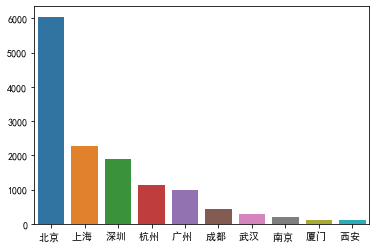

In [41]:
sns.barplot(x=s1_top10.index, y=s1_top10.values)

In [42]:
# 全国python职位散点图见附件

In [43]:
# 全国python职位热力图见附件

### 城市薪资

In [44]:
city_g = df.groupby('工作城市')

In [45]:
city_g['最低工资','最高工资'].mean().sort_values('最低工资', ascending=False)

,最低工资,最高工资
工作城市,,
香港特别行政区,27.500000,42.500000
海外,22.500000,40.000000
许昌,20.000000,40.000000
北京,19.885232,35.411444
上海,17.983686,31.023810
杭州,16.654354,29.272647
深圳,16.462845,29.350318
韶关,15.000000,20.000000
台北,15.000000,30.000000


由于香港海外许昌台北的数据量都比较小，工资按城市来排名分别是北上，深杭，广厦

In [46]:
top10_city = df.loc[df['工作城市'].isin(s1_top10.index)]

In [47]:
city_workyear_min_slary = top10_city.pivot_table(index='工作城市', columns=['工作经验','教育程度'], values=['最低工资'], aggfunc='mean')

In [48]:
city_workyear_max_slary = top10_city.pivot_table(index='工作城市', columns=['工作经验','教育程度'], values=['最高工资'], aggfunc='mean')

In [49]:
city_workyear_min_slary.head(10) # 全国十大城市拥有对应资历最低平均工资表

最低工资                                                       \
工作经验    经验1-3年                                              经验10年以上    
教育程度     博士及以上      大专及以上       学历不限      本科及以上      硕士及以上    大专及以上    
工作城市                                                                   
上海    30.000000   9.820513  13.848485  14.023747  19.605263      NaN   
北京    30.000000  10.400000  15.097561  15.504528  19.597484      NaN   
南京          NaN   7.142857  13.250000  10.000000  12.000000      NaN   
厦门          NaN   6.142857   7.000000   9.733333  15.000000      NaN   
广州    33.333333   8.127660  10.083333  11.727273  17.650000      NaN   
成都          NaN   7.700000  11.416667   9.077922  15.333333     13.0   
杭州          NaN  10.705882  13.947368  12.266272  18.444444      NaN   
武汉          NaN   7.846154   7.500000  10.456140  11.500000      NaN   
深圳    30.000000  10.509434  12.638889  12.842566  16.736842      NaN   
西安          NaN   6.333333   6.333333  10.190476  11.400000     20.0   

                                           ...                        \
工作经验                   经验1年以下              ...   经验5-10年       经验不限    
教育程度     本科及以上  硕士及以上   大专及以上      本科及以上   ...     硕士及以上      博士及以上    
工作城市                                       ...                         
上海    34.800000   30.0    20.0  10.733333  ...  30.969697  25.000000   
北京    31.181818   45.0     9.0  19.861111  ...  37.692308  25.000000   
南京          NaN    NaN     NaN        NaN  ...  20.000000  30.000000   
厦门    28.000000    NaN     NaN  11.500000  ...        NaN        NaN   
广州          NaN    NaN     6.0   7.666667  ...  25.000000  30.000000   
成都          NaN    NaN     4.0  13.666667  ...  20.500000        NaN   
杭州    25.000000    NaN     3.0   5.000000  ...  31.666667  30.000000   
武汉          NaN    NaN     NaN        NaN  ...  18.000000        NaN   
深圳    28.333333   60.0     9.5   8.714286  ...  32.266667  16.666667   
西安          NaN    NaN     NaN   4.000000  ...        NaN        NaN   

                                                                     \
工作经验                                             经验应届毕业生              
教育程度     大专及以上       学历不限      本科及以上      硕士及以上    大专及以上      学历不限    
工作城市                                                                  
上海    11.700000  14.781250  15.623932  16.926829      NaN  9.478261   
北京    10.600000  17.333333  17.995037  20.200000     11.7  9.791667   
南京    12.000000  10.000000  11.400000  12.571429      NaN  5.333333   
厦门          NaN  17.000000  12.000000  24.000000      NaN       NaN   
广州     9.687500  25.727273  11.660714  16.333333      1.0  2.000000   
成都     3.666667  13.666667  12.866667  13.333333      4.0  2.000000   
杭州    10.857143  15.185185  13.283333  15.307692      2.0  5.333333   
武汉     7.500000   6.000000   9.760000  11.500000      NaN  2.000000   
深圳     7.000000  14.375000  16.319444  21.043478      NaN  3.000000   
西安     5.000000        NaN   9.750000        NaN      NaN       NaN   

                            
工作经验                        
教育程度     本科及以上      硕士及以上   
工作城市                        
上海    11.276923  13.000000  
北京     7.738281   8.381579  
南京     8.625000   7.600000  
厦门     8.666667        NaN  
广州     5.828571   7.111111  
成都     5.400000   4.833333  
杭州     9.843137  15.375000  
武汉     9.400000  10.000000  
深圳    10.590909   6.500000  
西安     6.666667        NaN  

[10 rows x 30 columns]

In [50]:
city_workyear_max_slary.head(10) # 全国十大城市拥有对应资历最高平均工资表

最高工资                                                       \
工作经验    经验1-3年                                              经验10年以上    
教育程度     博士及以上      大专及以上       学历不限      本科及以上      硕士及以上    大专及以上    
工作城市                                                                   
上海    50.000000  15.666667  24.848485  24.559367  36.447368      NaN   
北京    55.000000  17.800000  27.146341  28.116429  36.993711      NaN   
南京          NaN  12.285714  19.500000  16.935484  21.800000      NaN   
厦门          NaN  10.285714  14.000000  17.533333  29.000000      NaN   
广州    53.333333  14.042553  16.750000  20.695187  31.750000      NaN   
成都          NaN  12.900000  19.416667  15.428571  24.222222     22.0   
杭州          NaN  20.000000  26.842105  22.076923  31.296296      NaN   
武汉          NaN  12.615385  12.250000  18.947368  20.000000      NaN   
深圳    50.000000  18.396226  23.222222  23.215743  30.105263      NaN   
西安          NaN  11.000000  11.000000  16.761905  20.800000     25.0   

                                           ...                        \
工作经验                   经验1年以下              ...   经验5-10年       经验不限    
教育程度     本科及以上  硕士及以上   大专及以上      本科及以上   ...     硕士及以上      博士及以上    
工作城市                                       ...                         
上海    53.600000   50.0    40.0  19.866667  ...  50.878788  46.666667   
北京    52.818182   76.0    11.0  28.583333  ...  65.288462  45.000000   
南京          NaN    NaN     NaN        NaN  ...  32.000000  60.000000   
厦门    51.000000    NaN     NaN  22.000000  ...        NaN        NaN   
广州          NaN    NaN     9.0  13.666667  ...  50.000000  60.000000   
成都          NaN    NaN     8.0  24.000000  ...  37.666667        NaN   
杭州    45.000000    NaN     6.0   7.750000  ...  51.666667  45.000000   
武汉          NaN    NaN     NaN        NaN  ...  35.000000        NaN   
深圳    43.333333  120.0    17.0  12.142857  ...  61.133333  30.000000   
西安          NaN    NaN     NaN   6.000000  ...        NaN        NaN   

                                                                      \
工作经验                                             经验应届毕业生               
教育程度     大专及以上       学历不限      本科及以上      硕士及以上    大专及以上       学历不限    
工作城市                                                                   
上海    21.900000  27.343750  28.923077  29.707317      NaN  16.521739   
北京    16.400000  32.433333  32.965261  38.150000     23.2  18.875000   
南京    19.000000  19.250000  21.700000  24.142857      NaN   8.000000   
厦门          NaN  33.750000  22.857143  48.000000      NaN        NaN   
广州    14.812500  45.000000  20.946429  29.666667      2.0   3.000000   
成都     7.333333  23.333333  22.266667  23.333333      8.0   4.000000   
杭州    17.857143  28.111111  24.666667  30.153846      4.0   9.500000   
武汉    15.000000  11.500000  17.720000  22.500000      NaN   4.000000   
深圳    12.000000  24.625000  29.958333  40.565217      NaN   6.000000   
西安     9.333333        NaN  19.250000        NaN      NaN        NaN   

                            
工作经验                        
教育程度     本科及以上      硕士及以上   
工作城市                        
上海    18.400000  21.133333  
北京    13.019531  14.407895  
南京    12.125000  13.000000  
厦门    14.333333        NaN  
广州     9.714286  13.444444  
成都     9.200000   8.333333  
杭州    18.333333  27.125000  
武汉    17.400000  15.000000  
深圳    18.318182  12.500000  
西安    11.666667        NaN  

[10 rows x 30 columns]

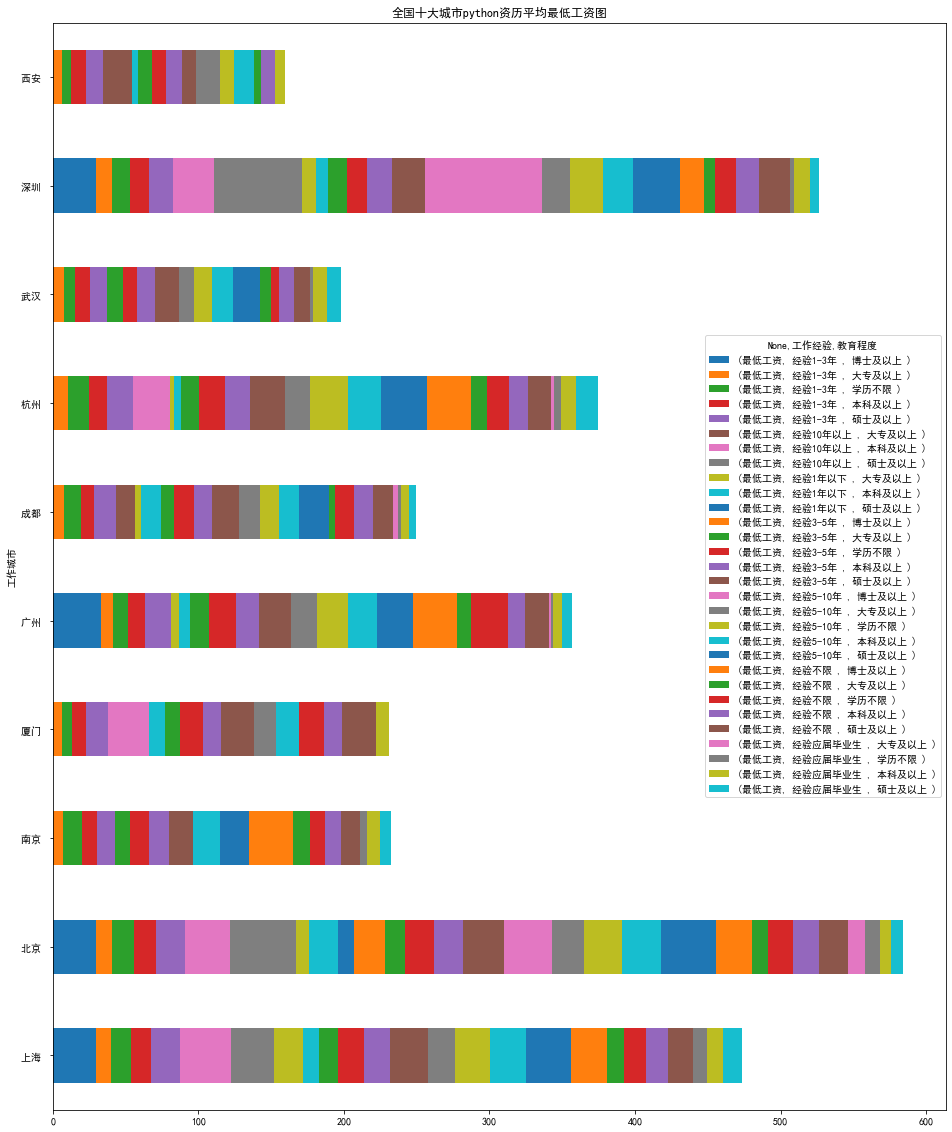

In [51]:
city_workyear_min_slary.plot(kind='barh', stacked=True, figsize=[16,20], title='全国十大城市python资历平均最低工资图') # 全国十大城市拥有对应资历最低平均工资图

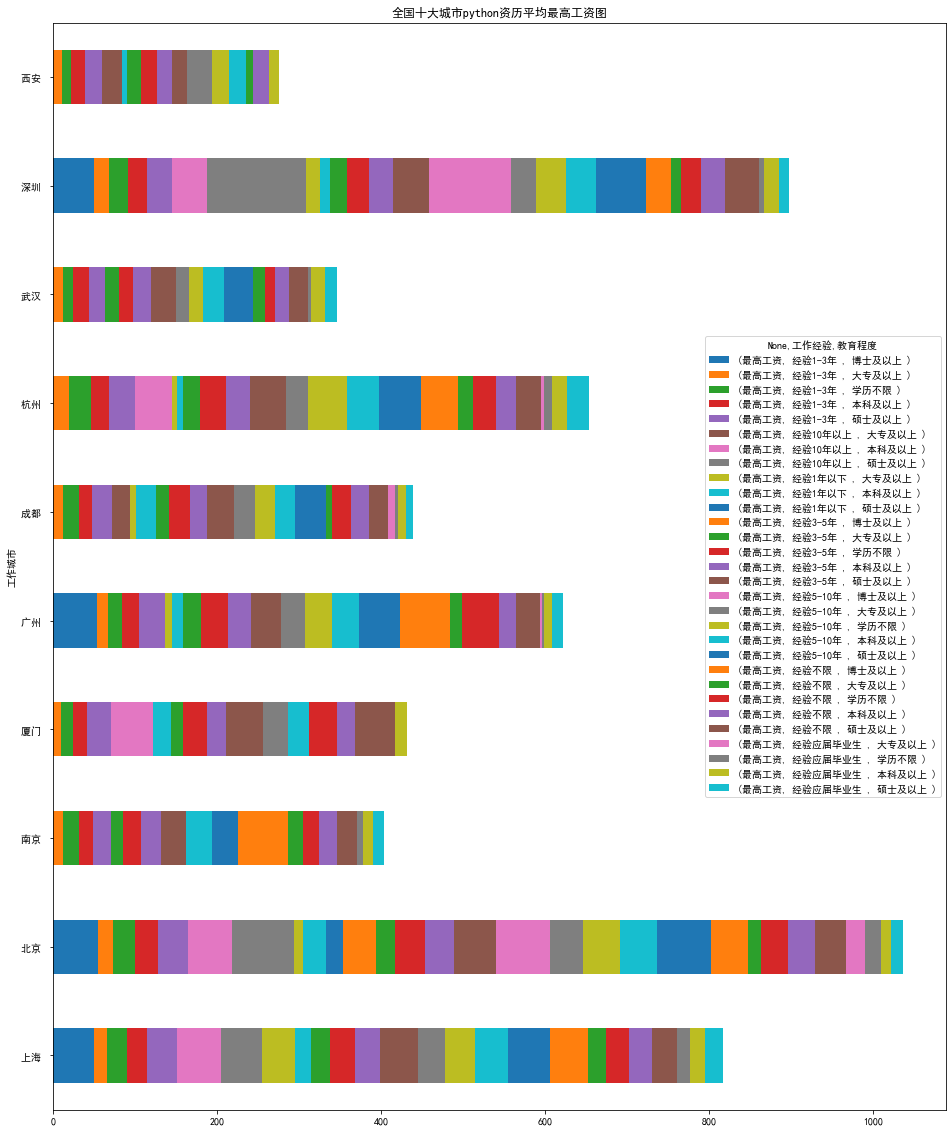

In [52]:
city_workyear_max_slary.plot(kind='barh', stacked=True, figsize=[16,20], title='全国十大城市python资历平均最高工资图') # 全国十大城市拥有对应资历最低平均工资图

### 教育程度要求

In [53]:
df['教育程度'].value_counts()

本科及以上     10833
硕士及以上      1316
大专及以上      1000
学历不限        913
博士及以上        34
Name: 教育程度, dtype: int64

除了1913个工作岗位的工作门槛在不限以及大专外，其他均要求本科以上

### 工作经验以及状况要求

In [54]:
df['工作经验'].value_counts()

经验3-5年      6730
经验1-3年      2957
经验5-10年     2258
经验不限        1316
经验应届毕业生      708
经验1年以下        93
经验10年以上       34
Name: 工作经验, dtype: int64

大部分工作面向拥有一年以上的从业经验者，对应届毕业生不是很友好,可能这个时间点不是校招的原因

In [55]:
df['工作状况'].value_counts()

全职    13685
实习      356
兼职       55
Name: 工作状况, dtype: int64

基本上所有的公司需要的都是全职人员，而实习和兼职只有一小部分

### 薪资总体情况

In [56]:
df[['最低工资', '最高工资']].describe()

,最低工资,最高工资
count,14096.000000,14096.000000
mean,17.382733,30.635570
std,8.947588,15.932032
min,1.000000,2.000000
25%,10.000000,20.000000
50%,15.000000,30.000000
75%,20.000000,40.000000
max,200.000000,400.000000


Python从业者，平均起薪到达17k，最高工资可以到达400k

In [57]:
df[df.最高工资 == 400] # 叮咚传送公司的运筹优化算法工程师为python从业者的最高薪水

,职位名称,工作城市,工作地点,工作经验,职位链接,教育程度,工作状况,职位标签,发布时间,公司名称,公司标签,融资情况,公司人数,职位诱惑,职位描述,最低工资,最高工资,职位分类
5131,运筹优化算法工程师,北京,北京-海淀区-五道口- 1.清华大学-北京市海淀区双清路 77 号双清大厦）。查看地图,经验不限,https://www.lagou.com/jobs/5886269.html?show=7...,硕士及以上,全职,"物流,数据挖掘,算法",2019/7/30,叮咚传送,消费生活,A轮,150-500人,五险一金。弹性工作,岗位描述：\n1.?负责公司智能配送算法的开发。基于先进运筹优化理论结合实际场景和一线业务需...,200,400,算法工程师


### 行业分布

In [58]:
df['公司标签'].value_counts().iloc[:20]

移动互联网         1322
金融            1097
文娱丨内容          622
电商             500
移动互联网,金融       489
移动互联网,电商       486
社交             469
移动互联网,数据服务     461
消费生活           386
移动互联网,教育       373
人工智能           364
信息安全           359
移动互联网,企业服务     356
硬件             353
工具             340
企业服务           336
数据服务           325
企业服务,数据服务      310
教育             246
移动互联网,游戏       231
Name: 公司标签, dtype: int64

移动互联网是Python相关从业者最多的行业，而金融次之

### 职位标签

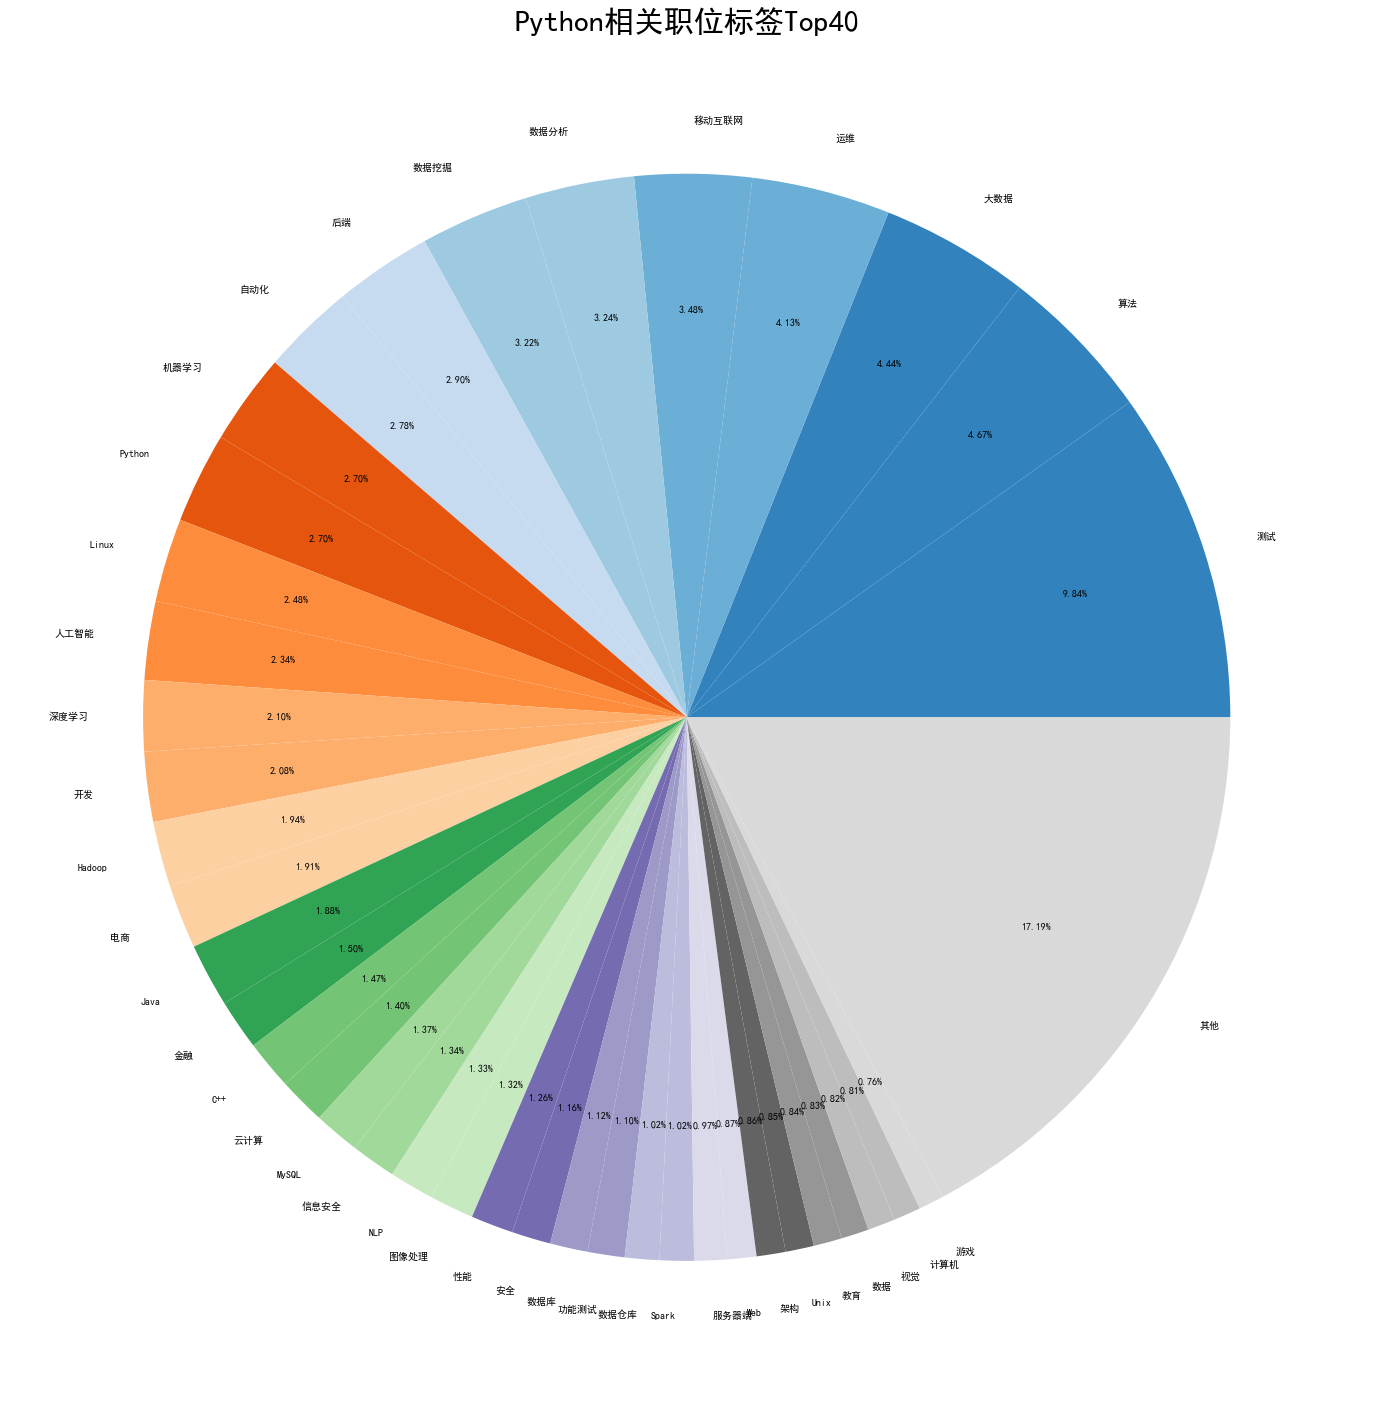

<Figure size 432x288 with 0 Axes>

In [274]:
 #饼图颜色使用colormap，在cm.后按Tab健可以换颜色风格，自行选择
colors = cm.tab20c(np.arange(len(labels_top40))/len(labels_top40))
 #画布大小
fig = plt.figure(1, figsize=(25,25))
# 画饼图（数据，数据对应的标签，autopct：百分数保留两位小数点，colors：颜色,
# labeldistance: 外部文本距离圆心的距离（半径），pctdistance：百分比的距离）
plt.pie(py_X_top40,labels=py_labels_top40,autopct='%1.2f%%',colors=colors,labeldistance = 1.1, pctdistance = 0.75)
plt.title("Python相关职位标签Top40", fontsize = 30)
plt.show()  
plt.savefig("PieChart.jpg")

### 职位诱惑

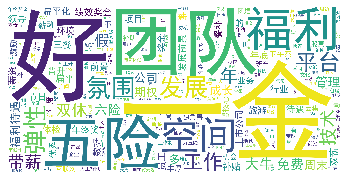

In [80]:
# mask = np.array(Image.open('wordcloud.jpg')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
#     mask=mask, # 设置背景图
    background_color='white',
    scale=8,
    max_words=400
)

wc.generate_from_frequencies(py_advanteges_counts) # 从字典生成词云
# image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
# wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.savefig("py_advantege.jpg",dpi=400)
plt.show() # 显示图像

五险一金，团队和福利是大部分公司的共同诱惑点

### 职位描述

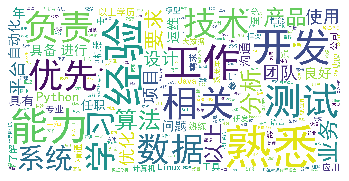

In [275]:
# mask = np.array(Image.open('wordcloud.jpg')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
#     mask=mask, # 设置背景图
    background_color='white',
    width=400,
    height=200,
    max_words=500,
    scale=8
)

wc.generate_from_frequencies(py_descs_counts) # 从字典生成词云
# image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
# wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.savefig("py_desc.jpg",dpi=400)
plt.show() # 显示图像

总结来说的话：
1.要求基本技能必须熟悉
2.拥有工作经验
3.学历本科以上
4.拥有独立开发的能力
5.拥有怀抱新技术的能力
6.至少会一种以上的框架
7.有过项目经历
8.Linux，C，Java都有涉猎
9.具有优化调优的能力
10.熟练或者精通必要的技术

# Python开发工程师

### 城市职位分布

In [281]:
py_develop_city = py_develop['工作城市'].value_counts()

In [282]:
py_develop_city_top10 = py_develop_city.sort_values(ascending=False).iloc[:10]

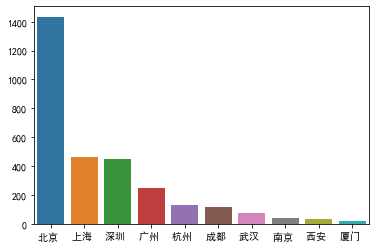

In [283]:
sns.barplot(x=py_develop_city_top10.index, y=py_develop_city_top10.values)

### 城市薪资

In [285]:
py_develop_city_g = py_develop.groupby('工作城市')

In [286]:
py_develop_city_g['最低工资','最高工资'].mean().sort_values('最低工资', ascending=False)

,最低工资,最高工资
工作城市,,
海外,22.500000,40.000000
许昌,20.000000,40.000000
北京,19.069735,34.139470
上海,18.681034,32.241379
珠海,16.750000,31.250000
深圳,16.705357,30.138393
杭州,16.132812,28.843750
无锡,15.000000,25.000000
广州,14.604839,25.383065


In [287]:
py_develop_top10_city = df.loc[df['工作城市'].isin(py_develop_city_top10.index)]

In [288]:
city_workyear_min_slary = py_develop_top10_city.pivot_table(index='工作城市', columns=['工作经验','教育程度'], values=['最低工资'], aggfunc='mean')

In [289]:
city_workyear_max_slary = py_develop_top10_city.pivot_table(index='工作城市', columns=['工作经验','教育程度'], values=['最高工资'], aggfunc='mean')

In [291]:
city_workyear_min_slary.head(10) # 全国十大城市拥有对应资历最低平均工资表

最低工资                                                       \
工作经验    经验1-3年                                              经验10年以上    
教育程度     博士及以上      大专及以上       学历不限      本科及以上      硕士及以上    大专及以上    
工作城市                                                                   
上海    30.000000   9.820513  13.848485  14.023747  19.605263      NaN   
北京    30.000000  10.400000  15.097561  15.504528  19.597484      NaN   
南京          NaN   7.142857  13.250000  10.000000  12.000000      NaN   
厦门          NaN   6.142857   7.000000   9.733333  15.000000      NaN   
广州    33.333333   8.127660  10.083333  11.727273  17.650000      NaN   
成都          NaN   7.700000  11.416667   9.077922  15.333333     13.0   
杭州          NaN  10.705882  13.947368  12.266272  18.444444      NaN   
武汉          NaN   7.846154   7.500000  10.456140  11.500000      NaN   
深圳    30.000000  10.509434  12.638889  12.842566  16.736842      NaN   
西安          NaN   6.333333   6.333333  10.190476  11.400000     20.0   

                                           ...                        \
工作经验                   经验1年以下              ...   经验5-10年       经验不限    
教育程度     本科及以上  硕士及以上   大专及以上      本科及以上   ...     硕士及以上      博士及以上    
工作城市                                       ...                         
上海    34.800000   30.0    20.0  10.733333  ...  30.969697  25.000000   
北京    31.181818   45.0     9.0  19.861111  ...  37.692308  25.000000   
南京          NaN    NaN     NaN        NaN  ...  20.000000  30.000000   
厦门    28.000000    NaN     NaN  11.500000  ...        NaN        NaN   
广州          NaN    NaN     6.0   7.666667  ...  25.000000  30.000000   
成都          NaN    NaN     4.0  13.666667  ...  20.500000        NaN   
杭州    25.000000    NaN     3.0   5.000000  ...  31.666667  30.000000   
武汉          NaN    NaN     NaN        NaN  ...  18.000000        NaN   
深圳    28.333333   60.0     9.5   8.714286  ...  32.266667  16.666667   
西安          NaN    NaN     NaN   4.000000  ...        NaN        NaN   

                                                                     \
工作经验                                             经验应届毕业生              
教育程度     大专及以上       学历不限      本科及以上      硕士及以上    大专及以上      学历不限    
工作城市                                                                  
上海    11.700000  14.781250  15.623932  16.926829      NaN  9.478261   
北京    10.600000  17.333333  17.995037  20.200000     11.7  9.791667   
南京    12.000000  10.000000  11.400000  12.571429      NaN  5.333333   
厦门          NaN  17.000000  12.000000  24.000000      NaN       NaN   
广州     9.687500  25.727273  11.660714  16.333333      1.0  2.000000   
成都     3.666667  13.666667  12.866667  13.333333      4.0  2.000000   
杭州    10.857143  15.185185  13.283333  15.307692      2.0  5.333333   
武汉     7.500000   6.000000   9.760000  11.500000      NaN  2.000000   
深圳     7.000000  14.375000  16.319444  21.043478      NaN  3.000000   
西安     5.000000        NaN   9.750000        NaN      NaN       NaN   

                            
工作经验                        
教育程度     本科及以上      硕士及以上   
工作城市                        
上海    11.276923  13.000000  
北京     7.738281   8.381579  
南京     8.625000   7.600000  
厦门     8.666667        NaN  
广州     5.828571   7.111111  
成都     5.400000   4.833333  
杭州     9.843137  15.375000  
武汉     9.400000  10.000000  
深圳    10.590909   6.500000  
西安     6.666667        NaN  

[10 rows x 30 columns]

In [292]:
city_workyear_max_slary.head(10) # 全国十大城市拥有对应资历最高平均工资表

最高工资                                                       \
工作经验    经验1-3年                                              经验10年以上    
教育程度     博士及以上      大专及以上       学历不限      本科及以上      硕士及以上    大专及以上    
工作城市                                                                   
上海    50.000000  15.666667  24.848485  24.559367  36.447368      NaN   
北京    55.000000  17.800000  27.146341  28.116429  36.993711      NaN   
南京          NaN  12.285714  19.500000  16.935484  21.800000      NaN   
厦门          NaN  10.285714  14.000000  17.533333  29.000000      NaN   
广州    53.333333  14.042553  16.750000  20.695187  31.750000      NaN   
成都          NaN  12.900000  19.416667  15.428571  24.222222     22.0   
杭州          NaN  20.000000  26.842105  22.076923  31.296296      NaN   
武汉          NaN  12.615385  12.250000  18.947368  20.000000      NaN   
深圳    50.000000  18.396226  23.222222  23.215743  30.105263      NaN   
西安          NaN  11.000000  11.000000  16.761905  20.800000     25.0   

                                           ...                        \
工作经验                   经验1年以下              ...   经验5-10年       经验不限    
教育程度     本科及以上  硕士及以上   大专及以上      本科及以上   ...     硕士及以上      博士及以上    
工作城市                                       ...                         
上海    53.600000   50.0    40.0  19.866667  ...  50.878788  46.666667   
北京    52.818182   76.0    11.0  28.583333  ...  65.288462  45.000000   
南京          NaN    NaN     NaN        NaN  ...  32.000000  60.000000   
厦门    51.000000    NaN     NaN  22.000000  ...        NaN        NaN   
广州          NaN    NaN     9.0  13.666667  ...  50.000000  60.000000   
成都          NaN    NaN     8.0  24.000000  ...  37.666667        NaN   
杭州    45.000000    NaN     6.0   7.750000  ...  51.666667  45.000000   
武汉          NaN    NaN     NaN        NaN  ...  35.000000        NaN   
深圳    43.333333  120.0    17.0  12.142857  ...  61.133333  30.000000   
西安          NaN    NaN     NaN   6.000000  ...        NaN        NaN   

                                                                      \
工作经验                                             经验应届毕业生               
教育程度     大专及以上       学历不限      本科及以上      硕士及以上    大专及以上       学历不限    
工作城市                                                                   
上海    21.900000  27.343750  28.923077  29.707317      NaN  16.521739   
北京    16.400000  32.433333  32.965261  38.150000     23.2  18.875000   
南京    19.000000  19.250000  21.700000  24.142857      NaN   8.000000   
厦门          NaN  33.750000  22.857143  48.000000      NaN        NaN   
广州    14.812500  45.000000  20.946429  29.666667      2.0   3.000000   
成都     7.333333  23.333333  22.266667  23.333333      8.0   4.000000   
杭州    17.857143  28.111111  24.666667  30.153846      4.0   9.500000   
武汉    15.000000  11.500000  17.720000  22.500000      NaN   4.000000   
深圳    12.000000  24.625000  29.958333  40.565217      NaN   6.000000   
西安     9.333333        NaN  19.250000        NaN      NaN        NaN   

                            
工作经验                        
教育程度     本科及以上      硕士及以上   
工作城市                        
上海    18.400000  21.133333  
北京    13.019531  14.407895  
南京    12.125000  13.000000  
厦门    14.333333        NaN  
广州     9.714286  13.444444  
成都     9.200000   8.333333  
杭州    18.333333  27.125000  
武汉    17.400000  15.000000  
深圳    18.318182  12.500000  
西安    11.666667        NaN  

[10 rows x 30 columns]

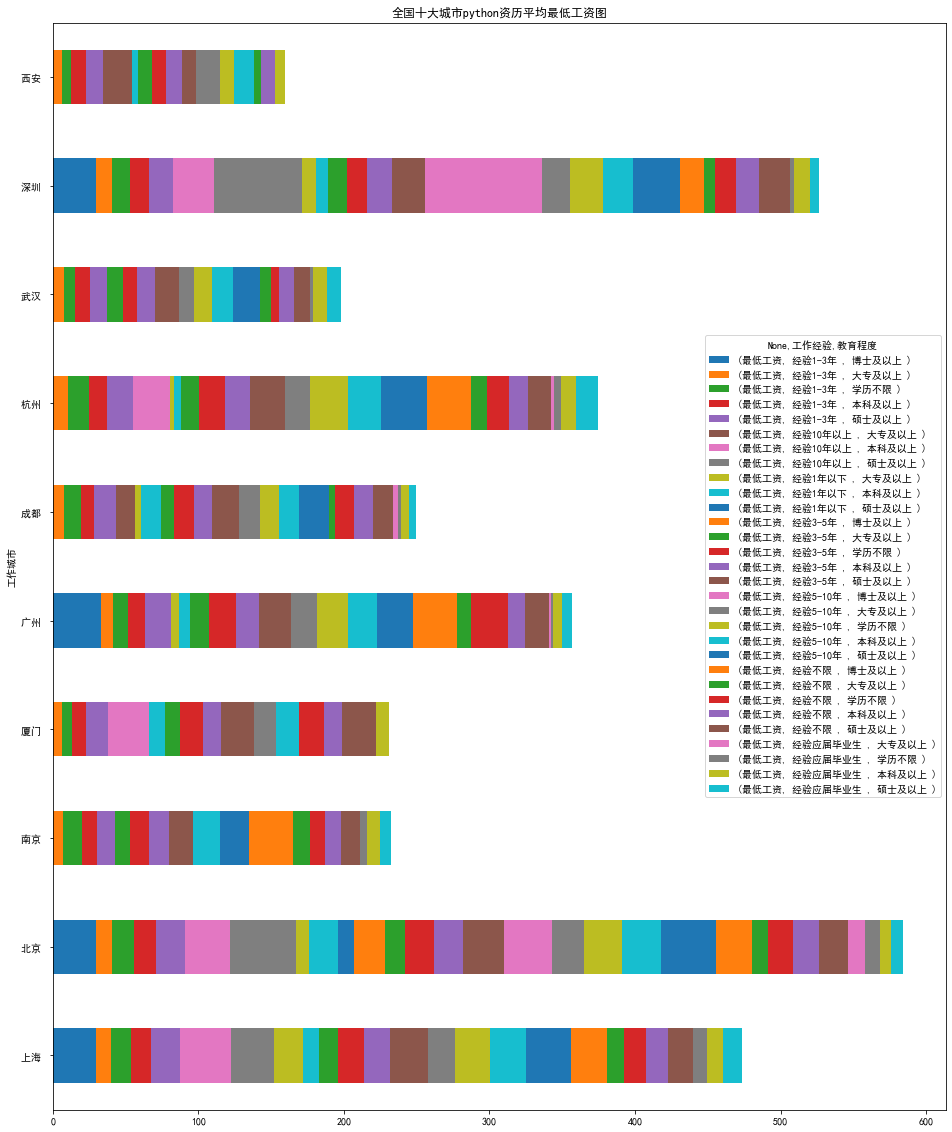

In [293]:
city_workyear_min_slary.plot(kind='barh', stacked=True, figsize=[16,20], title='全国十大城市python开发工程师资历平均最低工资图') # 全国十大城市拥有对应资历最低平均工资图

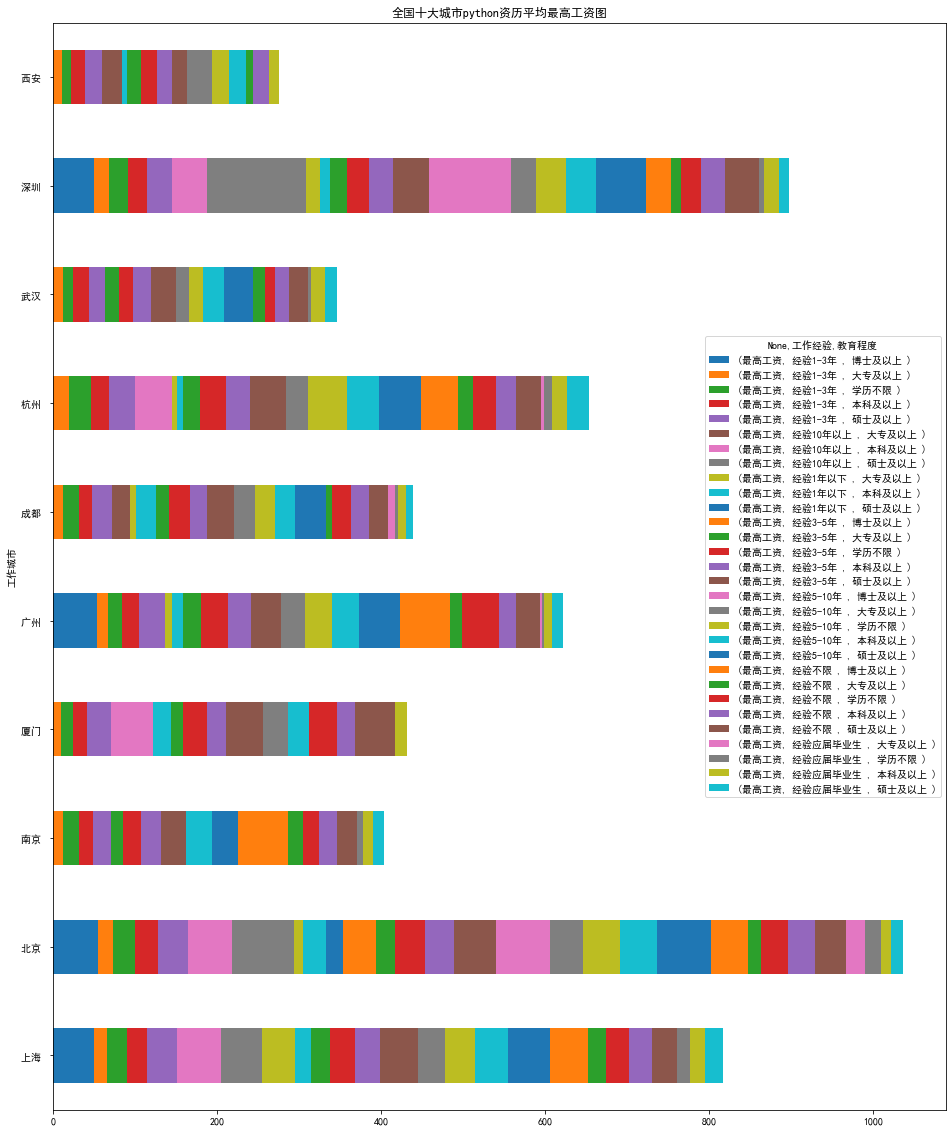

In [294]:
city_workyear_max_slary.plot(kind='barh', stacked=True, figsize=[16,20], title='全国十大城市python开发工程师资历平均最高工资图') # 全国十大城市拥有对应资历最低平均工资图

### 教育程度要求

In [296]:
py_develop['教育程度'].value_counts()

本科及以上     2622
大专及以上      212
学历不限       209
硕士及以上      103
博士及以上        5
Name: 教育程度, dtype: int64

除了约15/2的岗位不限制大专学历，其他均设置本科为门槛

### 工作经验以及状况要求

In [299]:
py_develop['工作经验'].value_counts()

经验3-5年      1418
经验1-3年       757
经验5-10年      412
经验不限         324
经验应届毕业生      202
经验1年以下        31
经验10年以上        7
Name: 工作经验, dtype: int64

大约有5/1的岗位是面向应届生或者经验不足1年者

In [300]:
py_develop['工作状况'].value_counts()

全职    3021
实习     110
兼职      20
Name: 工作状况, dtype: int64

基本上没有兼职和实习的岗位，均为全职

### 薪资总体情况

In [302]:
py_develop[['最低工资', '最高工资']].describe()

,最低工资,最高工资
count,3151.000000,3151.000000
mean,17.073627,30.296414
std,7.982300,14.427962
min,1.000000,2.000000
25%,12.000000,20.000000
50%,15.000000,30.000000
75%,20.000000,40.000000
max,65.000000,100.000000


In [305]:
py_develop[py_develop.最高工资 == 100] # 最高薪水均为架构师

,职位名称,工作城市,工作地点,工作经验,职位链接,教育程度,工作状况,职位标签,发布时间,公司名称,公司标签,融资情况,公司人数,职位诱惑,职位描述,最低工资,最高工资,职位分类
5979,服务器架构师,北京,北京-海淀区-学院路- 泰兴大厦407查看地图,经验5-10年,https://www.lagou.com/jobs/2822850.html?show=a...,本科及以上,全职,"广告营销,游戏,PHP,架构师",1天前,最右,文娱丨内容,C轮,150-500人,"大牛云集,成长空间大,高薪高股,不打卡",职责：\n1.设计和实施亿级用户和海量数据挖掘系统，保证系统的扩展性；\n2.跟进世界先进技...,50,100,Python开发工程师
6295,服务器架构师,北京,北京-海淀区-学院路- 泰兴大厦407查看地图,经验5-10年,https://www.lagou.com/jobs/2822850.html?show=d...,本科及以上,全职,"广告营销,游戏,PHP,架构师",1天前,最右,文娱丨内容,C轮,150-500人,"大牛云集,成长空间大,高薪高股,不打卡",职责：\n1.设计和实施亿级用户和海量数据挖掘系统，保证系统的扩展性；\n2.跟进世界先进技...,50,100,Python开发工程师
6303,资深后台开发（系统架构）,北京,北京-海淀区-牡丹园- 祁家豁子8号健翔大厦512查看地图,经验5-10年,https://www.lagou.com/jobs/5469110.html?show=d...,本科及以上,全职,"教育,移动互联网,C++,GO,Linux/Unix,服务器端",2019/7/23,伴鱼口语,移动互联网,C轮,合鲸资本(C轮)，JAFCO(B轮)，SIG(A轮),产品牛、五险一金、租房补助,工作职责:1、微服务分布式框架及相关底层系统设计优化开发2、高性能中间件的设计与研发3、保障...,50,100,Python开发工程师
6516,资深后台开发（系统架构）,北京,北京-海淀区-牡丹园- 祁家豁子8号健翔大厦512查看地图,经验5-10年,https://www.lagou.com/jobs/5469110.html?show=1...,本科及以上,全职,"教育,移动互联网,C++,GO,Linux/Unix,服务器端",2019/7/23,伴鱼口语,移动互联网,C轮,合鲸资本(C轮)，JAFCO(B轮)，SIG(A轮),产品牛、五险一金、租房补助,工作职责:1、微服务分布式框架及相关底层系统设计优化开发2、高性能中间件的设计与研发3、保障...,50,100,Python开发工程师
9614,研发总监/VP,深圳,深圳-南山区-白石洲- 先健科技大厦2008查看地图,经验不限,https://www.lagou.com/jobs/4980223.html?show=3...,硕士及以上,全职,"系统架构,高级技术管理,团队建设",1天前,智言科技,"数据服务,其他",B轮,50-150人,"海归团队,股票期权,薪酬福利好,扁平管理",岗位职责：\n1、负责人工智能领域的研发和技术落地；\n2、负责AI 研发系统的架构设计，为...,50,100,Python开发工程师
10670,研发总监/VP,深圳,深圳-南山区-白石洲- 先健科技大厦2008查看地图,经验不限,https://www.lagou.com/jobs/4980223.html?show=6...,硕士及以上,全职,"系统架构,高级技术管理,团队建设",1天前,智言科技,"数据服务,其他",B轮,50-150人,"海归团队,股票期权,薪酬福利好,扁平管理",岗位职责：\n1、负责人工智能领域的研发和技术落地；\n2、负责AI 研发系统的架构设计，为...,50,100,Python开发工程师


### 行业分布

In [303]:
py_develop['公司标签'].value_counts().iloc[:20]

移动互联网         327
文娱丨内容         187
金融            157
人工智能          154
社交            154
信息安全          126
移动互联网,电商      107
移动互联网,数据服务     98
电商             97
企业服务,数据服务      90
企业服务           90
数据服务           88
移动互联网,企业服务     85
工具             85
移动互联网,游戏       79
移动互联网,金融       76
移动互联网,教育       75
游戏             58
教育             55
硬件             52
Name: 公司标签, dtype: int64

除了移动互联网外还有少量的文娱，金融，人工智能，社交以及信息安全

### 职位诱惑

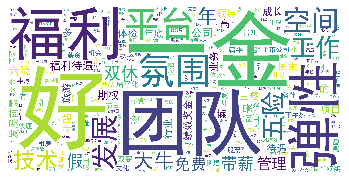

In [317]:
# mask = np.array(Image.open('wordcloud.jpg')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
#     mask=mask, # 设置背景图
    background_color='white',
    scale=8,
    max_words=400
)

wc.generate_from_frequencies(py_advanteges_counts) # 从字典生成词云
# image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
# wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.savefig("py_develop_advantege.jpg",dpi=400)
plt.show() # 显示图像

和整个python不同，后端开发的特点是弹性

### 职位描述

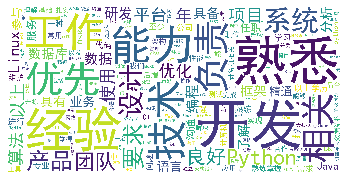

In [322]:
# mask = np.array(Image.open('wordcloud.jpg')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
#     mask=mask, # 设置背景图
    background_color='white',
    width=400,
    height=200,
    max_words=500,
    scale=8
)

wc.generate_from_frequencies(py_descs_counts) # 从字典生成词云
# image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
# wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.savefig("py_develop_desc.jpg",dpi=400)K
plt.show() # 显示图像

# 数据分析师

### 城市职位分布

In [371]:
data_analysis_city = data_analysis['工作城市'].value_counts()

In [372]:
data_analysis_city_top10 = data_analysis_city.sort_values(ascending=False).iloc[:10]

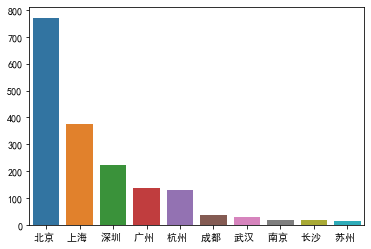

In [373]:
sns.barplot(x=data_analysis_city_top10.index, y=data_analysis_city_top10.values)

### 城市薪资

In [374]:
data_analysis_city_g = data_analysis.groupby('工作城市')

In [375]:
data_analysis_city_g['最低工资','最高工资'].mean().sort_values('最低工资', ascending=False)

,最低工资,最高工资
工作城市,,
香港特别行政区,35.000000,50.000000
北京,18.106355,31.846952
杭州,16.715385,28.292308
上海,16.376000,28.610667
佛山,15.833333,26.333333
深圳,15.708520,28.170404
厦门,15.300000,29.000000
韶关,15.000000,20.000000
南宁,15.000000,20.000000


In [376]:
data_analysis_top10_city = df.loc[df['工作城市'].isin(data_analysis_city_top10.index)]

In [377]:
city_workyear_min_slary = data_analysis_top10_city.pivot_table(index='工作城市', columns=['工作经验','教育程度'], values=['最低工资'], aggfunc='mean')

In [378]:
city_workyear_max_slary = data_analysis_top10_city.pivot_table(index='工作城市', columns=['工作经验','教育程度'], values=['最高工资'], aggfunc='mean')

In [379]:
city_workyear_min_slary.head(10) # 全国十大城市数据分析师资历平均最低工资表

最低工资                                                       \
工作经验    经验1-3年                                              经验10年以上    
教育程度     博士及以上      大专及以上       学历不限      本科及以上      硕士及以上    大专及以上    
工作城市                                                                   
上海    30.000000   9.820513  13.848485  14.023747  19.605263      NaN   
北京    30.000000  10.400000  15.097561  15.504528  19.597484      NaN   
南京          NaN   7.142857  13.250000  10.000000  12.000000      NaN   
广州    33.333333   8.127660  10.083333  11.727273  17.650000      NaN   
成都          NaN   7.700000  11.416667   9.077922  15.333333     13.0   
杭州          NaN  10.705882  13.947368  12.266272  18.444444      NaN   
武汉          NaN   7.846154   7.500000  10.456140  11.500000      NaN   
深圳    30.000000  10.509434  12.638889  12.842566  16.736842      NaN   
苏州          NaN   6.571429        NaN  11.666667  13.500000      NaN   
长沙          NaN   5.625000   7.000000   7.166667  12.500000      NaN   

                                           ...                        \
工作经验                   经验1年以下              ...   经验5-10年       经验不限    
教育程度     本科及以上  硕士及以上   大专及以上      本科及以上   ...     硕士及以上      博士及以上    
工作城市                                       ...                         
上海    34.800000   30.0    20.0  10.733333  ...  30.969697  25.000000   
北京    31.181818   45.0     9.0  19.861111  ...  37.692308  25.000000   
南京          NaN    NaN     NaN        NaN  ...  20.000000  30.000000   
广州          NaN    NaN     6.0   7.666667  ...  25.000000  30.000000   
成都          NaN    NaN     4.0  13.666667  ...  20.500000        NaN   
杭州    25.000000    NaN     3.0   5.000000  ...  31.666667  30.000000   
武汉          NaN    NaN     NaN        NaN  ...  18.000000        NaN   
深圳    28.333333   60.0     9.5   8.714286  ...  32.266667  16.666667   
苏州          NaN    NaN     NaN   5.000000  ...        NaN        NaN   
长沙          NaN    NaN     NaN        NaN  ...        NaN        NaN   

                                                                     \
工作经验                                             经验应届毕业生              
教育程度     大专及以上       学历不限      本科及以上      硕士及以上    大专及以上      学历不限    
工作城市                                                                  
上海    11.700000  14.781250  15.623932  16.926829      NaN  9.478261   
北京    10.600000  17.333333  17.995037  20.200000     11.7  9.791667   
南京    12.000000  10.000000  11.400000  12.571429      NaN  5.333333   
广州     9.687500  25.727273  11.660714  16.333333      1.0  2.000000   
成都     3.666667  13.666667  12.866667  13.333333      4.0  2.000000   
杭州    10.857143  15.185185  13.283333  15.307692      2.0  5.333333   
武汉     7.500000   6.000000   9.760000  11.500000      NaN  2.000000   
深圳     7.000000  14.375000  16.319444  21.043478      NaN  3.000000   
苏州          NaN  15.000000  14.857143  25.000000      NaN       NaN   
长沙     6.750000  12.000000   7.333333  14.333333      4.0       NaN   

                            
工作经验                        
教育程度     本科及以上      硕士及以上   
工作城市                        
上海    11.276923  13.000000  
北京     7.738281   8.381579  
南京     8.625000   7.600000  
广州     5.828571   7.111111  
成都     5.400000   4.833333  
杭州     9.843137  15.375000  
武汉     9.400000  10.000000  
深圳    10.590909   6.500000  
苏州     4.000000  14.333333  
长沙     3.000000        NaN  

[10 rows x 30 columns]

In [380]:
city_workyear_max_slary.head(10) # 全国十大城市数据分析师资历平均最高工资表

最高工资                                                       \
工作经验    经验1-3年                                              经验10年以上    
教育程度     博士及以上      大专及以上       学历不限      本科及以上      硕士及以上    大专及以上    
工作城市                                                                   
上海    50.000000  15.666667  24.848485  24.559367  36.447368      NaN   
北京    55.000000  17.800000  27.146341  28.116429  36.993711      NaN   
南京          NaN  12.285714  19.500000  16.935484  21.800000      NaN   
广州    53.333333  14.042553  16.750000  20.695187  31.750000      NaN   
成都          NaN  12.900000  19.416667  15.428571  24.222222     22.0   
杭州          NaN  20.000000  26.842105  22.076923  31.296296      NaN   
武汉          NaN  12.615385  12.250000  18.947368  20.000000      NaN   
深圳    50.000000  18.396226  23.222222  23.215743  30.105263      NaN   
苏州          NaN  10.571429        NaN  19.500000  24.500000      NaN   
长沙          NaN   9.250000  11.000000  11.555556  22.500000      NaN   

                                           ...                        \
工作经验                   经验1年以下              ...   经验5-10年       经验不限    
教育程度     本科及以上  硕士及以上   大专及以上      本科及以上   ...     硕士及以上      博士及以上    
工作城市                                       ...                         
上海    53.600000   50.0    40.0  19.866667  ...  50.878788  46.666667   
北京    52.818182   76.0    11.0  28.583333  ...  65.288462  45.000000   
南京          NaN    NaN     NaN        NaN  ...  32.000000  60.000000   
广州          NaN    NaN     9.0  13.666667  ...  50.000000  60.000000   
成都          NaN    NaN     8.0  24.000000  ...  37.666667        NaN   
杭州    45.000000    NaN     6.0   7.750000  ...  51.666667  45.000000   
武汉          NaN    NaN     NaN        NaN  ...  35.000000        NaN   
深圳    43.333333  120.0    17.0  12.142857  ...  61.133333  30.000000   
苏州          NaN    NaN     NaN  10.000000  ...        NaN        NaN   
长沙          NaN    NaN     NaN        NaN  ...        NaN        NaN   

                                                                      \
工作经验                                             经验应届毕业生               
教育程度     大专及以上       学历不限      本科及以上      硕士及以上    大专及以上       学历不限    
工作城市                                                                   
上海    21.900000  27.343750  28.923077  29.707317      NaN  16.521739   
北京    16.400000  32.433333  32.965261  38.150000     23.2  18.875000   
南京    19.000000  19.250000  21.700000  24.142857      NaN   8.000000   
广州    14.812500  45.000000  20.946429  29.666667      2.0   3.000000   
成都     7.333333  23.333333  22.266667  23.333333      8.0   4.000000   
杭州    17.857143  28.111111  24.666667  30.153846      4.0   9.500000   
武汉    15.000000  11.500000  17.720000  22.500000      NaN   4.000000   
深圳    12.000000  24.625000  29.958333  40.565217      NaN   6.000000   
苏州          NaN  30.000000  28.571429  46.666667      NaN        NaN   
长沙     9.500000  18.000000  12.666667  25.000000      8.0        NaN   

                            
工作经验                        
教育程度     本科及以上      硕士及以上   
工作城市                        
上海    18.400000  21.133333  
北京    13.019531  14.407895  
南京    12.125000  13.000000  
广州     9.714286  13.444444  
成都     9.200000   8.333333  
杭州    18.333333  27.125000  
武汉    17.400000  15.000000  
深圳    18.318182  12.500000  
苏州     6.000000  28.333333  
长沙     4.000000        NaN  

[10 rows x 30 columns]

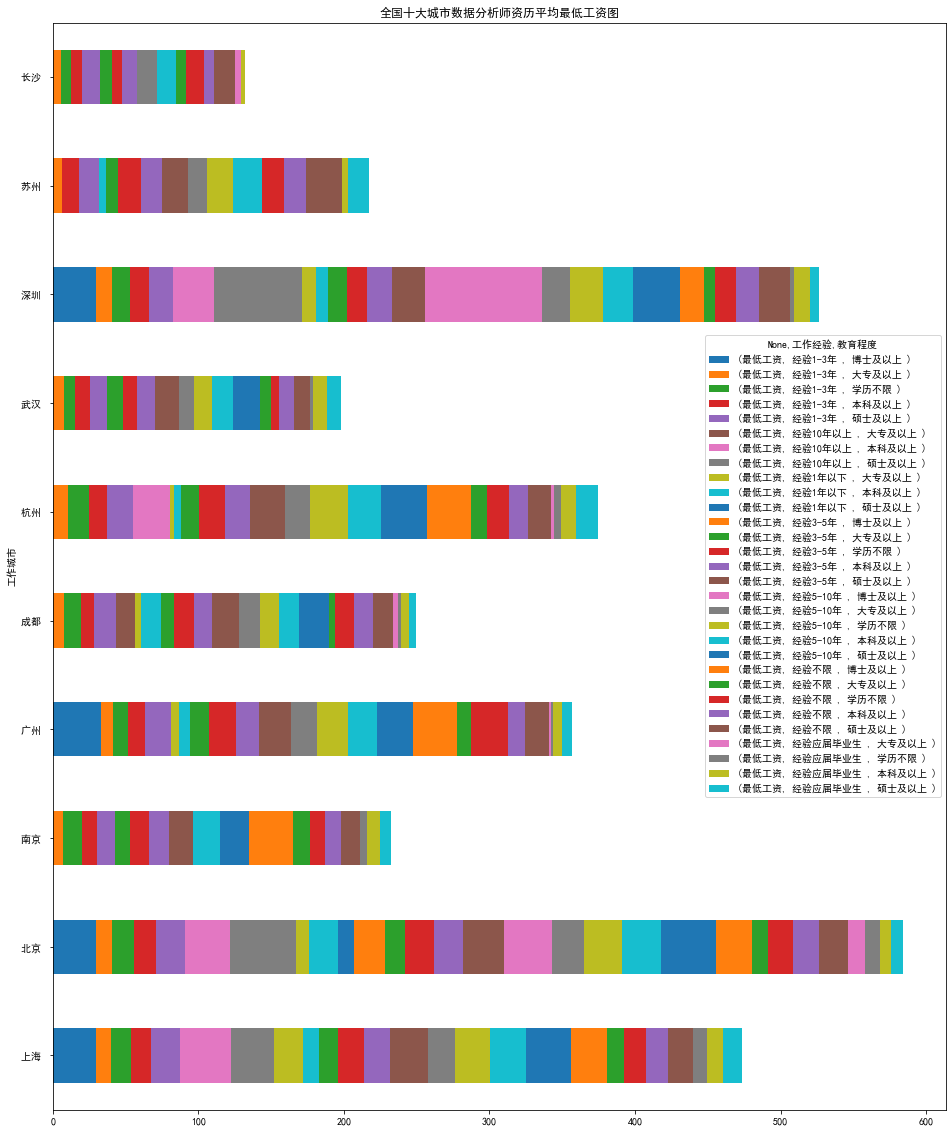

In [381]:
city_workyear_min_slary.plot(kind='barh', stacked=True, figsize=[16,20], title='全国十大城市数据分析师资历平均最低工资图') # 全国十大城市拥有对应资历最低平均工资图

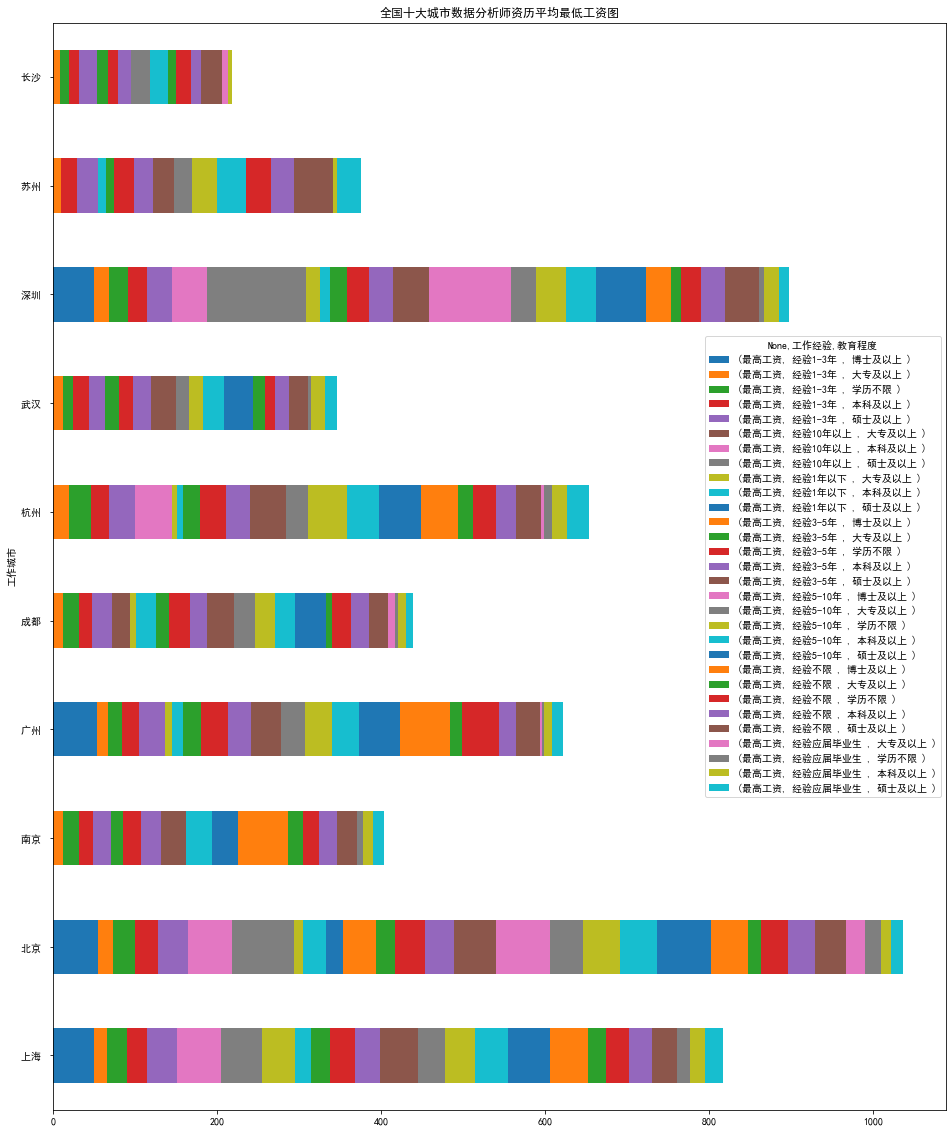

In [382]:
city_workyear_max_slary.plot(kind='barh', stacked=True, figsize=[16,20], title='全国十大城市数据分析师资历平均最低工资图') # 全国十大城市拥有对应资历最低平均工资图

### 教育程度要求

In [383]:
data_analysis['教育程度'].value_counts()

本科及以上     1510
硕士及以上      115
学历不限       106
大专及以上       87
博士及以上        1
Name: 教育程度, dtype: int64

除了约9/1的岗位不限制大专学历，其他均设置本科和硕士为门槛

### 工作经验以及状况要求

In [384]:
data_analysis['工作经验'].value_counts()

经验3-5年      831
经验1-3年      412
经验5-10年     314
经验不限        163
经验应届毕业生      79
经验1年以下       15
经验10年以上       5
Name: 工作经验, dtype: int64

大约有9/1的岗位是面向应届生或者经验不足1年者

In [385]:
data_analysis['工作状况'].value_counts()

全职    1774
实习      38
兼职       7
Name: 工作状况, dtype: int64

基本上没有兼职和实习的岗位，均为全职

### 薪资总体情况

In [386]:
data_analysis[['最低工资', '最高工资']].describe()

,最低工资,最高工资
count,1819.000000,1819.000000
mean,16.283672,28.471688
std,7.382584,13.247647
min,1.000000,2.000000
25%,10.000000,20.000000
50%,15.000000,26.000000
75%,20.000000,38.000000
max,50.000000,100.000000


In [387]:
data_analysis[data_analysis.最高工资 == 100] # 最高薪水为上海的高级数据分析总监

,职位名称,工作城市,工作地点,工作经验,职位链接,教育程度,工作状况,职位标签,发布时间,公司名称,公司标签,融资情况,公司人数,职位诱惑,职位描述,最低工资,最高工资,职位分类
13402,高级数据分析总监,上海,上海-虹口区- 塘沽路查看地图,经验5-10年,https://www.lagou.com/jobs/6146512.html?show=4...,本科及以上,全职,"电商,工具软件",2019/8/1,靖琪,移动互联网,天使轮,50-150人,"公司实力强,成长空间大,福利待遇好",主要职责：?\n1、全面负责公司的各个业务线业务模型的开发和维护;?\n2、为管理层制定策略...,50,100,数据分析工程师


### 行业分布

In [389]:
data_analysis['公司标签'].value_counts().iloc[:20]

金融            260
移动互联网         143
移动互联网,金融      101
文娱丨内容          68
数据服务           65
消费生活           63
移动互联网,电商       58
移动互联网,数据服务     58
硬件             56
社交             49
电商             46
企业服务,数据服务      45
旅游             44
移动互联网,教育       43
信息安全,数据服务      38
金融,移动互联网       31
移动互联网,消费生活     28
汽车丨出行          26
游戏             25
工具             24
Name: 公司标签, dtype: int64

在数据分析领域，金融和移动互联网不相上下

### 职位诱惑

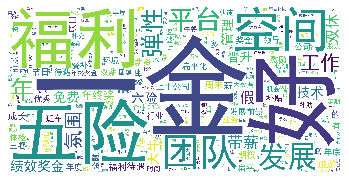

In [391]:
# mask = np.array(Image.open('wordcloud.jpg')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
#     mask=mask, # 设置背景图
    background_color='white',
    scale=8,
    max_words=400
)

wc.generate_from_frequencies(py_advanteges_counts) # 从字典生成词云
# image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
# wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.savefig("data_analysis_advantege.jpg",dpi=400)
plt.show() # 显示图像

和整个python不同，后端开发的特点是弹性

### 职位描述

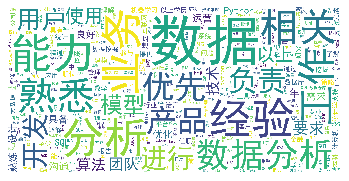

In [393]:
# mask = np.array(Image.open('wordcloud.jpg')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
#     mask=mask, # 设置背景图
    background_color='white',
    width=400,
    height=200,
    max_words=500,
    scale=8
)

wc.generate_from_frequencies(py_descs_counts) # 从字典生成词云
# image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
# wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.savefig("data_analysis_desc.jpg",dpi=400)
plt.show() # 显示图像

# 数据挖掘工程师

### 城市职位分布

In [394]:
data_digout_city = data_digout['工作城市'].value_counts()

In [396]:
data_digout_city_top10 = data_digout_city.sort_values(ascending=False).iloc[:10]

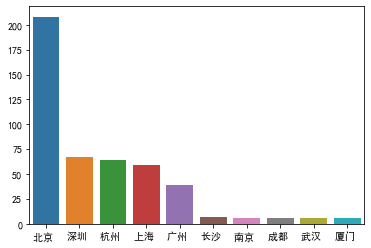

In [397]:
sns.barplot(x=data_digout_city_top10.index, y=data_digout_city_top10.values)

### 城市薪资

In [398]:
data_digout_city_g = data_digout.groupby('工作城市')

In [399]:
data_digout_city_g['最低工资','最高工资'].mean().sort_values('最低工资', ascending=False)

,最低工资,最高工资
工作城市,,
大连,40.000000,80.000000
北京,21.326923,38.778846
佛山,20.000000,40.000000
深圳,19.507463,35.492537
上海,18.372881,32.644068
杭州,16.859375,29.578125
苏州,15.000000,27.500000
厦门,15.000000,28.333333
广州,14.128205,24.615385


In [400]:
data_digout_top10_city = df.loc[df['工作城市'].isin(data_digout_city_top10.index)]

In [401]:
city_workyear_min_slary = data_analysis_top10_city.pivot_table(index='工作城市', columns=['工作经验','教育程度'], values=['最低工资'], aggfunc='mean')

In [402]:
city_workyear_max_slary = data_analysis_top10_city.pivot_table(index='工作城市', columns=['工作经验','教育程度'], values=['最高工资'], aggfunc='mean')

In [403]:
city_workyear_min_slary.head(10) # 全国十大城市数据挖掘工程师资历平均最低工资表

最低工资                                                       \
工作经验    经验1-3年                                              经验10年以上    
教育程度     博士及以上      大专及以上       学历不限      本科及以上      硕士及以上    大专及以上    
工作城市                                                                   
上海    30.000000   9.820513  13.848485  14.023747  19.605263      NaN   
北京    30.000000  10.400000  15.097561  15.504528  19.597484      NaN   
南京          NaN   7.142857  13.250000  10.000000  12.000000      NaN   
广州    33.333333   8.127660  10.083333  11.727273  17.650000      NaN   
成都          NaN   7.700000  11.416667   9.077922  15.333333     13.0   
杭州          NaN  10.705882  13.947368  12.266272  18.444444      NaN   
武汉          NaN   7.846154   7.500000  10.456140  11.500000      NaN   
深圳    30.000000  10.509434  12.638889  12.842566  16.736842      NaN   
苏州          NaN   6.571429        NaN  11.666667  13.500000      NaN   
长沙          NaN   5.625000   7.000000   7.166667  12.500000      NaN   

                                           ...                        \
工作经验                   经验1年以下              ...   经验5-10年       经验不限    
教育程度     本科及以上  硕士及以上   大专及以上      本科及以上   ...     硕士及以上      博士及以上    
工作城市                                       ...                         
上海    34.800000   30.0    20.0  10.733333  ...  30.969697  25.000000   
北京    31.181818   45.0     9.0  19.861111  ...  37.692308  25.000000   
南京          NaN    NaN     NaN        NaN  ...  20.000000  30.000000   
广州          NaN    NaN     6.0   7.666667  ...  25.000000  30.000000   
成都          NaN    NaN     4.0  13.666667  ...  20.500000        NaN   
杭州    25.000000    NaN     3.0   5.000000  ...  31.666667  30.000000   
武汉          NaN    NaN     NaN        NaN  ...  18.000000        NaN   
深圳    28.333333   60.0     9.5   8.714286  ...  32.266667  16.666667   
苏州          NaN    NaN     NaN   5.000000  ...        NaN        NaN   
长沙          NaN    NaN     NaN        NaN  ...        NaN        NaN   

                                                                     \
工作经验                                             经验应届毕业生              
教育程度     大专及以上       学历不限      本科及以上      硕士及以上    大专及以上      学历不限    
工作城市                                                                  
上海    11.700000  14.781250  15.623932  16.926829      NaN  9.478261   
北京    10.600000  17.333333  17.995037  20.200000     11.7  9.791667   
南京    12.000000  10.000000  11.400000  12.571429      NaN  5.333333   
广州     9.687500  25.727273  11.660714  16.333333      1.0  2.000000   
成都     3.666667  13.666667  12.866667  13.333333      4.0  2.000000   
杭州    10.857143  15.185185  13.283333  15.307692      2.0  5.333333   
武汉     7.500000   6.000000   9.760000  11.500000      NaN  2.000000   
深圳     7.000000  14.375000  16.319444  21.043478      NaN  3.000000   
苏州          NaN  15.000000  14.857143  25.000000      NaN       NaN   
长沙     6.750000  12.000000   7.333333  14.333333      4.0       NaN   

                            
工作经验                        
教育程度     本科及以上      硕士及以上   
工作城市                        
上海    11.276923  13.000000  
北京     7.738281   8.381579  
南京     8.625000   7.600000  
广州     5.828571   7.111111  
成都     5.400000   4.833333  
杭州     9.843137  15.375000  
武汉     9.400000  10.000000  
深圳    10.590909   6.500000  
苏州     4.000000  14.333333  
长沙     3.000000        NaN  

[10 rows x 30 columns]

In [404]:
city_workyear_max_slary.head(10) # 全国十大城市数据挖掘工程师资历平均最高工资表

最高工资                                                       \
工作经验    经验1-3年                                              经验10年以上    
教育程度     博士及以上      大专及以上       学历不限      本科及以上      硕士及以上    大专及以上    
工作城市                                                                   
上海    50.000000  15.666667  24.848485  24.559367  36.447368      NaN   
北京    55.000000  17.800000  27.146341  28.116429  36.993711      NaN   
南京          NaN  12.285714  19.500000  16.935484  21.800000      NaN   
广州    53.333333  14.042553  16.750000  20.695187  31.750000      NaN   
成都          NaN  12.900000  19.416667  15.428571  24.222222     22.0   
杭州          NaN  20.000000  26.842105  22.076923  31.296296      NaN   
武汉          NaN  12.615385  12.250000  18.947368  20.000000      NaN   
深圳    50.000000  18.396226  23.222222  23.215743  30.105263      NaN   
苏州          NaN  10.571429        NaN  19.500000  24.500000      NaN   
长沙          NaN   9.250000  11.000000  11.555556  22.500000      NaN   

                                           ...                        \
工作经验                   经验1年以下              ...   经验5-10年       经验不限    
教育程度     本科及以上  硕士及以上   大专及以上      本科及以上   ...     硕士及以上      博士及以上    
工作城市                                       ...                         
上海    53.600000   50.0    40.0  19.866667  ...  50.878788  46.666667   
北京    52.818182   76.0    11.0  28.583333  ...  65.288462  45.000000   
南京          NaN    NaN     NaN        NaN  ...  32.000000  60.000000   
广州          NaN    NaN     9.0  13.666667  ...  50.000000  60.000000   
成都          NaN    NaN     8.0  24.000000  ...  37.666667        NaN   
杭州    45.000000    NaN     6.0   7.750000  ...  51.666667  45.000000   
武汉          NaN    NaN     NaN        NaN  ...  35.000000        NaN   
深圳    43.333333  120.0    17.0  12.142857  ...  61.133333  30.000000   
苏州          NaN    NaN     NaN  10.000000  ...        NaN        NaN   
长沙          NaN    NaN     NaN        NaN  ...        NaN        NaN   

                                                                      \
工作经验                                             经验应届毕业生               
教育程度     大专及以上       学历不限      本科及以上      硕士及以上    大专及以上       学历不限    
工作城市                                                                   
上海    21.900000  27.343750  28.923077  29.707317      NaN  16.521739   
北京    16.400000  32.433333  32.965261  38.150000     23.2  18.875000   
南京    19.000000  19.250000  21.700000  24.142857      NaN   8.000000   
广州    14.812500  45.000000  20.946429  29.666667      2.0   3.000000   
成都     7.333333  23.333333  22.266667  23.333333      8.0   4.000000   
杭州    17.857143  28.111111  24.666667  30.153846      4.0   9.500000   
武汉    15.000000  11.500000  17.720000  22.500000      NaN   4.000000   
深圳    12.000000  24.625000  29.958333  40.565217      NaN   6.000000   
苏州          NaN  30.000000  28.571429  46.666667      NaN        NaN   
长沙     9.500000  18.000000  12.666667  25.000000      8.0        NaN   

                            
工作经验                        
教育程度     本科及以上      硕士及以上   
工作城市                        
上海    18.400000  21.133333  
北京    13.019531  14.407895  
南京    12.125000  13.000000  
广州     9.714286  13.444444  
成都     9.200000   8.333333  
杭州    18.333333  27.125000  
武汉    17.400000  15.000000  
深圳    18.318182  12.500000  
苏州     6.000000  28.333333  
长沙     4.000000        NaN  

[10 rows x 30 columns]

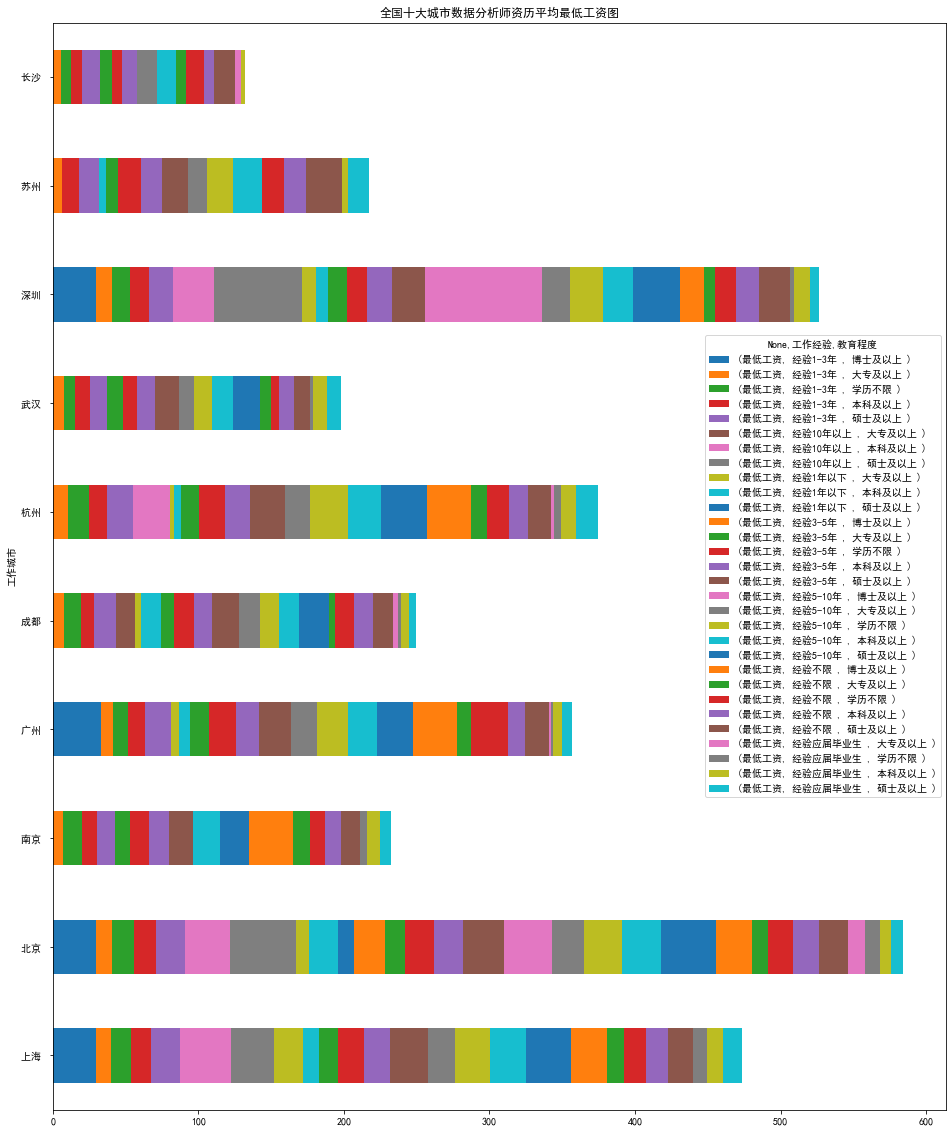

In [405]:
city_workyear_min_slary.plot(kind='barh', stacked=True, figsize=[16,20], title='全国十大城市数据挖掘工程师资历平均最低工资图') # 全国十大城市拥有对应资历最低平均工资图

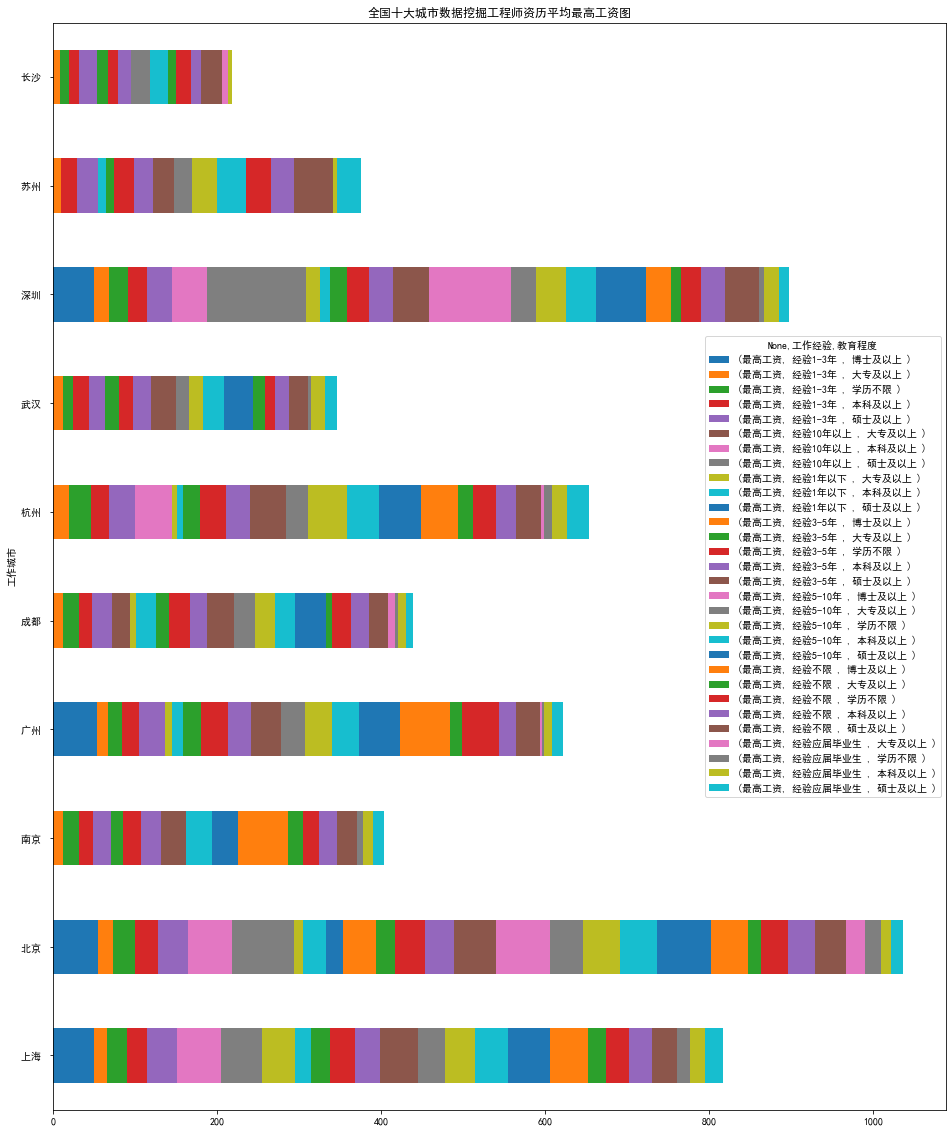

In [406]:
city_workyear_max_slary.plot(kind='barh', stacked=True, figsize=[16,20], title='全国十大城市数据挖掘工程师资历平均最高工资图') # 全国十大城市拥有对应资历最低平均工资图

### 教育程度要求

In [407]:
data_digout['教育程度'].value_counts()

本科及以上     366
硕士及以上      59
学历不限       45
大专及以上      12
博士及以上       1
Name: 教育程度, dtype: int64

除了约8/1的岗位不限制大专学历，其他均设置本科和硕士为门槛

### 工作经验以及状况要求

In [408]:
data_digout['工作经验'].value_counts()

经验3-5年      251
经验1-3年       97
经验5-10年      63
经验不限         44
经验应届毕业生      25
经验1年以下        2
经验10年以上       1
Name: 工作经验, dtype: int64

大约有7/1的岗位是面向应届生或者经验不足1年者

In [409]:
data_digout['工作状况'].value_counts()

全职    470
实习     12
兼职      1
Name: 工作状况, dtype: int64

基本上没有兼职和实习的岗位，均为全职

### 薪资总体情况

In [410]:
data_digout[['最低工资', '最高工资']].describe()

,最低工资,最高工资
count,483.000000,483.000000
mean,18.687371,33.598344
std,8.853791,16.330106
min,1.000000,2.000000
25%,15.000000,25.000000
50%,18.000000,30.000000
75%,25.000000,40.000000
max,60.000000,100.000000


In [412]:
data_digout[data_digout.最高工资 == 100] # 最高薪水为数据挖掘专家

,职位名称,工作城市,工作地点,工作经验,职位链接,教育程度,工作状况,职位标签,发布时间,公司名称,公司标签,融资情况,公司人数,职位诱惑,职位描述,最低工资,最高工资,职位分类
223,漏洞挖掘工程师,大连,大连-沙河口区- 星海广场君悦酒店君尚中心查看地图,经验1-3年,https://www.lagou.com/jobs/5626717.html?show=5...,大专及以上,全职,"信息安全,移动互联网,C,Windows,架构师,Linux/Unix",2天前,暗泉信息,信息安全,不需要融资,15-50人,五险一金 海景办公 弹性工作 年终奖金,漏洞挖掘工程师 10K - 40K/月\n\n技能要求\n1.?精通C语言、Python语言...,50,100,数据挖掘工程师
2068,数据挖掘工程师/专家,北京,北京-朝阳区-东坝- 北京市朝阳区驼房营南里甲6号正北方向71米，898创新产业园东门查看地图,经验3-5年,https://www.lagou.com/jobs/5791322.html?show=c...,硕士及以上,全职,"电商,移动互联网,数据挖掘",2019/7/30,车好多集团,消费生活,D轮及以上,H CAPITAL、招银电信基金、首钢基金、红杉资本、经纬创投、蓝驰创投等(B轮)，红杉资本...,具有挑战力的落地应用场景，成长空间,岗位职责：\n-刻画用户的业务生命周期，为每一步业务环节的转化建立精准的预测模型\n-丰富用...,50,100,数据挖掘工程师
2075,数据挖掘（用户画像）,北京,北京-朝阳区-东坝- 北京市朝阳区驼房营南里甲6号正北方向71米，898创新产业园东门查看地图,经验5-10年,https://www.lagou.com/jobs/6053038.html?show=c...,硕士及以上,全职,"电商,移动互联网,数据架构,数据分析",2019/7/30,车好多集团,消费生活,D轮及以上,H CAPITAL、招银电信基金、首钢基金、红杉资本、经纬创投、蓝驰创投等(B轮)，红杉资本...,一线互联网技术背景+全年最高19薪,岗位职责： ? ?\n1.刻画用户的业务生命周期，为每一步业务环节的转化建立精准的预测模型 ...,50,100,数据挖掘工程师
3415,数据挖掘工程师/专家,北京,北京-朝阳区-东坝- 北京市朝阳区驼房营南里甲6号正北方向71米，898创新产业园东门查看地图,经验3-5年,https://www.lagou.com/jobs/5791322.html?show=7...,硕士及以上,全职,"电商,移动互联网,数据挖掘",2019/7/30,车好多集团,消费生活,D轮及以上,H CAPITAL、招银电信基金、首钢基金、红杉资本、经纬创投、蓝驰创投等(B轮)，红杉资本...,具有挑战力的落地应用场景，成长空间,岗位职责：\n-刻画用户的业务生命周期，为每一步业务环节的转化建立精准的预测模型\n-丰富用...,50,100,数据挖掘工程师
3417,数据挖掘（用户画像）,北京,北京-朝阳区-东坝- 北京市朝阳区驼房营南里甲6号正北方向71米，898创新产业园东门查看地图,经验5-10年,https://www.lagou.com/jobs/6053038.html?show=7...,硕士及以上,全职,"电商,移动互联网,数据架构,数据分析",2019/7/30,车好多集团,消费生活,D轮及以上,H CAPITAL、招银电信基金、首钢基金、红杉资本、经纬创投、蓝驰创投等(B轮)，红杉资本...,一线互联网技术背景+全年最高19薪,岗位职责： ? ?\n1.刻画用户的业务生命周期，为每一步业务环节的转化建立精准的预测模型 ...,50,100,数据挖掘工程师
11110,资深数据挖掘工程师,深圳,深圳-宝安区-新安- 广东省深圳市南山区软件园查看地图,经验3-5年,https://www.lagou.com/jobs/6099768.html?show=f...,本科及以上,全职,"大数据,BI,数据分析,数据库,SPSS",2019/7/11,顶尖传奇,文娱丨内容,未融资,50-150人,薪资open,岗位职责：\n1、负责推荐系统、广告系统的数据模型开发及算法优化；\n2、负责用户标签的算法...,60,100,数据挖掘工程师


### 行业分布

In [413]:
data_digout['公司标签'].value_counts().iloc[:20]

移动互联网         48
金融            37
移动互联网,金融      29
文娱丨内容         28
移动互联网,数据服务    20
电商            19
企业服务,数据服务     19
消费生活          18
信息安全          18
移动互联网,电商      18
工具            17
硬件            15
移动互联网,硬件      15
移动互联网,企业服务    12
社交            12
信息安全,数据服务      9
移动互联网,游戏       9
企业服务           9
数据服务           8
房产家居           8
Name: 公司标签, dtype: int64

在数据分析领域，金融和移动互联网不相上下

### 职位诱惑

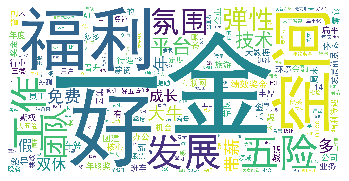

In [420]:
# mask = np.array(Image.open('wordcloud.jpg')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
#     mask=mask, # 设置背景图
    background_color='white',
    scale=8,
    max_words=400
)

wc.generate_from_frequencies(py_advanteges_counts) # 从字典生成词云
# image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
# wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.savefig("data_digout_advantege.jpg",dpi=400)
plt.show() # 显示图像

和整个python不同，后端开发的特点是弹性

### 职位描述

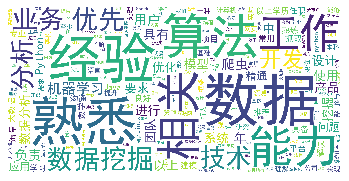

In [421]:
# mask = np.array(Image.open('wordcloud.jpg')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
#     mask=mask, # 设置背景图
    background_color='white',
    width=400,
    height=200,
    max_words=500,
    scale=8
)

wc.generate_from_frequencies(py_descs_counts) # 从字典生成词云
# image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
# wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.savefig("data_digout_desc.jpg",dpi=400)
plt.show() # 显示图像

数据挖掘对算法也是有一定的要求的